# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


In [1]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.8.4
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [13]:
# Try loading one file
df = pd.read_parquet("/Users/manojaaryan/Desktop/Upgrad/case_study1/Datasets and Dictionary/trip_records/2023-1.parquet")
df.head()
#df.info()
# df = pd.read_parquet('2023-1.parquet')
# df.info()



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

In [15]:

pd.to_datetime(df['tpep_pickup_datetime']).dt.date

0          2023-01-01
1          2023-01-01
2          2023-01-01
3          2023-01-01
4          2023-01-01
              ...    
3066761    2023-01-31
3066762    2023-01-31
3066763    2023-01-31
3066764    2023-01-31
3066765    2023-01-31
Name: tpep_pickup_datetime, Length: 3041714, dtype: object

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [54]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
#df = pd.read_parquet("/Users/manojaaryan/Desktop/Upgrad/case_study1/Datasets and Dictionary/trip_records/2023-1.parquet")
import random
       

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
if len(hour_df) >= sample_size:
            sampled_group = hour_df.sample(n=sample_size, random_state=42)
        else:
            sampled_group = hour_df.sample(n=len(hour_df), replace=True, random_state=42)

In [35]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
import random


# Select the folder having data files
os.chdir('/Users/manojaaryan/Desktop/Upgrad/case_study1/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
sdf = pd.DataFrame()


# iterate through the list of files and sample one by one:
#for file_name in file_list:
try:
    # file path for the current file
    file_path = os.path.join(os.getcwd(), file_name)

    # Reading the current file
     # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
    # After completing iteration through each date, we will append this data to the final dataframe.
    sampled_data = pd.DataFrame()
    
    df1 = pd.read_parquet("/Users/manojaaryan/Desktop/Upgrad/case_study1/Datasets and Dictionary/trip_records/2023-12.parquet")
    
    
    #for index, row in df1.iterrows():
    #df1['tpep_pickup_datetime'] = pd.to_datetime[df1['tpep_pickup_datetime']]
    print('Before date for')
    for date in df1['tpep_pickup_datetime'].dt.date.unique():
        date_df = df1[df1['tpep_pickup_datetime'].dt.date == date]
        for hr in date_df['tpep_pickup_datetime'].dt.hour.unique():
            hour_df = date_df[date_df['tpep_pickup_datetime'].dt.hour == hr]
            sample_size = int(len(hour_df) * 0.05)
            if len(hour_df) >= sample_size:
                sampled_group = hour_df.sample(n=sample_size, random_state=42)
            else:
                sampled_group = hour_df.sample(n=len(hour_df), replace=True, random_state=42)
            sampled_data = sampled_data._append(sampled_group)            
            #print(len(sampled_group))
    print('After date for')
            
    # Loop through dates and then loop through every hour of each date

        # Iterate through each hour of the selected date

            # Sample 5% of the hourly data randomly

            # add data of this hour to the dataframe

    # Concatenate the sampled data of all the dates to a single dataframe
    print('Before concat')
    sdf = sdf._append(sampled_data)# we initialised this empty DF earlier
    print('After concat')
except Exception as e:
    print(f"Error reading file {file_name}: {e}")

print('Done')
sdf.to_parquet('/Users/manojaaryan/Desktop/Upgrad/case_study1/Datasets and Dictionary/trip_records/2023-12_sample.parquet')
print('File creation done')

Before date for
After date for
Before concat
After concat
Done
File creation done


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [45]:
# Store the df in csv/parquet
#sdf.to_parquet('/Users/manojaaryan/Desktop/Upgrad/case_study1/Datasets and Dictionary/trip_records/2023-all_sample.parquet')
#print('done')

import pandas as pd
import glob
import os

def combine_parquet_files(directory, output_filename="/Users/manojaaryan/Desktop/Upgrad/case_study1/Datasets and Dictionary/Sample/sample.parquet"):
    """Combines all Parquet files in a directory into one.

    Args:
        directory (str): Path to the directory containing Parquet files.
        output_filename (str, optional): Name for the combined Parquet file. Defaults to "combined.parquet".
    """
    all_files = glob.glob(os.path.join(directory, "*.parquet"))
    all_df = []
    for f in all_files:
        df = pd.read_parquet(f)
        all_df.append(df)
    
    if all_df:  # Check if the list is not empty
        combined_df = pd.concat(all_df, ignore_index=True)
        combined_df.to_parquet(output_filename)
        print(f"Combined data saved to {output_filename}")
    else:
        print("No Parquet files found in the directory.")

# Example usage:'/Users/manojaaryan/Desktop/Upgrad/case_study1/Datasets and Dictionary/Sample'
directory_path = "/Users/manojaaryan/Desktop/Upgrad/case_study1/Datasets and Dictionary/Sample/" 
combine_parquet_files(directory_path)

Combined data saved to /Users/manojaaryan/Desktop/Upgrad/case_study1/Datasets and Dictionary/Sample/sample.parquet


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [47]:
# Load the new data file
print('done')


dfsample = pd.read_parquet("/Users/manojaaryan/Desktop/Upgrad/case_study1/Datasets and Dictionary/Sample/sample.parquet")
dfsample.head()

done


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-02-01 00:14:06   2023-02-01 00:19:52              3.0   
1         1  2023-02-01 00:54:09   2023-02-01 01:13:13              1.0   
2         2  2023-02-01 00:14:36   2023-02-01 00:59:16              1.0   
3         1  2023-02-01 00:49:25   2023-02-01 00:53:12              1.0   
4         1  2023-02-01 00:16:02   2023-02-01 00:22:02              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.25         1.0                  N           234           114   
1           5.00         1.0                  N            48            87   
2          24.04         1.0                  N           114           121   
3           0.60         1.0                  N           246            68   
4           0.90         1.0                  N           114           148   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          8.6    1.0      0.5        6.12           0.0   
1             1         23.3    3.5      0.5        0.00           0.0   
2             1         91.2    1.0      0.5        6.00           0.0   
3             1          5.8    3.5      0.5        1.00           0.0   
4             1          7.9    3.5      0.5        2.55           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         19.72                   2.5          0.0   
1                    1.0         28.30                   2.5          0.0   
2                    1.0        102.20                   2.5          0.0   
3                    1.0         11.80                   2.5          0.0   
4                    1.0         15.45                   2.5          0.0   

   airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [57]:
 dfsample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1892247 entries, 0 to 1892246
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [51]:
# df.info()
dfsample.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.892247e+06                     1892247                     1892247   
mean   1.733014e+00  2023-07-02 19:59:53.951040  2023-07-02 20:17:20.062665   
min    1.000000e+00         2023-01-01 00:00:57         2023-01-01 00:09:35   
25%    1.000000e+00         2023-04-02 16:11:59  2023-04-02 16:31:04.500000   
50%    2.000000e+00         2023-06-27 15:36:36         2023-06-27 15:53:30   
75%    2.000000e+00  2023-10-06 19:48:24.500000         2023-10-06 20:06:08   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476458e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.827587e+06   1.892247e+06  1.827587e+06  1.892247e+06   
mean      1.369193e+00   3.858372e+00  1.633796e+00  1.652905e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.926774e-01   1.295503e+02  7.388476e+00  6.399875e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.892247e+06  1.892247e+06  1.892247e+06  1.892247e+06  1.892247e+06   
mean   1.640557e+02  1.163814e+00  1.991709e+01  1.588364e+00  4.952883e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00 -2.500000e+00 -5.000000e-01   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.980069e+01  5.080436e-01  1.056480e+02  1.829489e+00  4.880884e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.892247e+06  1.892247e+06           1.892247e+06  1.892247e+06   
mean   3.546864e+00  5.963117e-01           9.989730e-01  2.897963e+01   
min    0.000000e+00  0.000000e+00          -1.000000e+00 -5.750000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.054163e+00  2.187370e+00           3.108738e-02  1.065260e+02   

       congestion_surcharge   Airport_fee    airport_fee  
count          1.827587e+06  1.679458e+06  148129.000000  
mean           2.307670e+00  1.458709e-01       0.108993  
min           -2.500000e+00 -1.750000e+00      -1.250000  
25%            2.500000e+00  0.000000e+00       0.000000  
50%            2.500000e+00  0.000000e+00       0.000000  
75%            2.500000e+00  0.000000e+00       0.000000  
max            2.500000e+00  1.750000e+00       1.250000  
std            6.664957e-01  4.733543e-01       0.352681

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [55]:
# Fix the index and drop any columns that are not needed
#dfsample.reset_index()

dfsample.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-02-01 00:14:06   2023-02-01 00:19:52              3.0   
1         1  2023-02-01 00:54:09   2023-02-01 01:13:13              1.0   
2         2  2023-02-01 00:14:36   2023-02-01 00:59:16              1.0   
3         1  2023-02-01 00:49:25   2023-02-01 00:53:12              1.0   
4         1  2023-02-01 00:16:02   2023-02-01 00:22:02              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.25         1.0                  N           234           114   
1           5.00         1.0                  N            48            87   
2          24.04         1.0                  N           114           121   
3           0.60         1.0                  N           246            68   
4           0.90         1.0                  N           114           148   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          8.6    1.0      0.5        6.12           0.0   
1             1         23.3    3.5      0.5        0.00           0.0   
2             1         91.2    1.0      0.5        6.00           0.0   
3             1          5.8    3.5      0.5        1.00           0.0   
4             1          7.9    3.5      0.5        2.55           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         19.72                   2.5          0.0   
1                    1.0         28.30                   2.5          0.0   
2                    1.0        102.20                   2.5          0.0   
3                    1.0         11.80                   2.5          0.0   
4                    1.0         15.45                   2.5          0.0   

   airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [59]:
# Combine the two airport fee columns

# Function to add columns, handling nulls
def add_cols(row):
    if pd.isna(row['Airport_fee']) and pd.isna(row['airport_fee']):
        return np.nan
    elif pd.isna(row['Airport_fee']):
        return row['airport_fee']
    elif pd.isna(row['airport_fee']):
        return row['Airport_fee']
    else:
        return row['Airport_fee'] + row['airport_fee']

# Apply the function to create the new column
dfsample['Airport_Fee'] = dfsample.apply(add_cols, axis=1)

**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [3]:
# check where values of fare amount are negative

#dfsample = dfsample.drop(columns=['Airport_fee','airport_fee'])
#dfsample.head()

#dfsample = dfsample[~(dfsample['improvement_surcharge'] < 0)]
#import the libraries
import pandas as pd
import numpy as np
#dfsample[dfsample['Airport_Fee'] < 0]
dfsample = pd.read_parquet("/Users/manojaaryan/Desktop/Upgrad/case_study1/Datasets and Dictionary/Sample/sample1.parquet")
#dfsample.to_parquet('/Users/manojaaryan/Desktop/Upgrad/case_study1/Datasets and Dictionary/Sample/sample1.parquet')

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts



In [5]:
# Find which columns have negative values
dfsample[dfsample['extra'] < 0]
dfsample[dfsample['mta_tax'] < 0]
dfsample[dfsample['tip_amount'] < 0]
dfsample[dfsample['tolls_amount'] < 0]
dfsample[dfsample['improvement_surcharge'] < 0]
dfsample[dfsample['total_amount'] < 0]
dfsample[dfsample['congestion_surcharge'] < 0]
dfsample[dfsample['Airport_Fee'] < 0]


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
76247           2  2023-02-15 10:55:02   2023-02-15 11:56:22              1.0   
213307          2  2023-03-13 11:40:22   2023-03-13 11:51:53              1.0   
222988          2  2023-03-20 12:10:40   2023-03-20 13:03:14              1.0   
427360          2  2023-06-21 16:01:44   2023-06-21 17:11:47              1.0   
577085          2  2023-12-17 08:10:57   2023-12-17 08:28:46              1.0   
776006          2  2023-08-30 19:11:33   2023-08-30 19:37:35              2.0   
803912          2  2023-04-10 18:40:15   2023-04-10 18:44:09              1.0   
953805          2  2023-01-03 14:24:45   2023-01-03 14:25:14              1.0   
1323986         2  2023-10-17 00:56:18   2023-10-17 00:56:35              1.0   
1324562         2  2023-10-17 08:39:40   2023-10-17 08:41:19              1.0   
1438651         2  2023-11-05 17:01:32   2023-11-05 19:03:35              1.0   
1474167         2  2023-11-11 18:50:47   2023-11-11 19:40:33              4.0   
1540438         2  2023-11-22 15:44:42   2023-11-22 15:45:57              1.0   
1735759         2  2023-05-09 17:05:56   2023-05-09 17:24:59              1.0   
1889031         2  2023-05-31 14:52:23   2023-05-31 15:54:56              2.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
76247            12.34         1.0                  N           138   
213307            3.49         1.0                  N           138   
222988           16.11         2.0                  N           132   
427360           12.56         2.0                  N           132   
577085           11.27         1.0                  N           132   
776006            8.92         1.0                  N           138   
803912            0.36         1.0                  N           132   
953805            0.00         2.0                  N           132   
1323986           0.06         1.0                  N           132   
1324562           0.29         1.0                  N           138   
1438651         122.46         4.0                  N           132   
1474167          20.06         2.0                  N           132   
1540438           0.05         2.0                  N           132   
1735759           8.35         1.0                  N           132   
1889031          17.37         2.0                  N           132   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
76247             230             2          0.0    0.0     -0.5         0.0   
213307            253             2          0.0    0.0     -0.5         0.0   
222988            170             2          0.0    0.0     -0.5         0.0   
427360            114             2          0.0    0.0     -0.5         0.0   
577085             70             2          0.0    0.0     -0.5         0.0   
776006            234             2          0.0    0.0     -0.5         0.0   
803912            132             2          0.0    0.0     -0.5         0.0   
953805            132             2          0.0    0.0     -0.5         0.0   
1323986           132             2          0.0    0.0     -0.5         0.0   
1324562            70             2          0.0    0.0     -0.5         0.0   
1438651           265             2          0.0    0.0      0.0         0.0   
1474167           151             2          0.0    0.0     -0.5         0.0   
1540438           132             4          0.0    0.0     -0.5         0.0   
1735759           222             2          0.0    0.0     -0.5         0.0   
1889031           132             2          0.0    0.0     -0.5         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
76247             0.0                   -1.0         -5.25   
213307            0.0                   -1.0         -2.75   
222988            0.0                   -1.0         -5.25   
427360            0.0                   -1.0  

In [7]:
# fix these negative values

dfsample = dfsample[~(dfsample['extra'] < 0)]
dfsample = dfsample[~(dfsample['mta_tax'] < 0)]
dfsample = dfsample[~(dfsample['tip_amount'] < 0)]
dfsample = dfsample[~(dfsample['tolls_amount'] < 0)]
dfsample = dfsample[~(dfsample['improvement_surcharge'] < 0)]
dfsample = dfsample[~(dfsample['total_amount'] < 0)]
dfsample = dfsample[~(dfsample['congestion_surcharge'] < 0)]
dfsample = dfsample[~(dfsample['Airport_Fee'] < 0)]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [9]:
# Find the proportion of missing values in each column


nan_columns = dfsample.isnull().any()
print(nan_columns)

VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count           True
trip_distance            False
RatecodeID                True
store_and_fwd_flag        True
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge      True
Airport_Fee               True
dtype: bool


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [11]:
# Display the rows with null values
# Impute NaN values in 'passenger_count':64660

dfsample[dfsample['passenger_count'].isnull()]

dfsample = dfsample[~(dfsample['passenger_count'].isnull())]
dfsample[dfsample['passenger_count'].isnull()]


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_Fee]
Index: []

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [13]:
# Fix missing values in 'RatecodeID'
dfsample[((dfsample['RatecodeID'].isnull()) | (dfsample['RatecodeID']== '0.0') | (dfsample['RatecodeID']== '0'))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_Fee]
Index: []

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [16]:
# handle null values in congestion_surcharge
#dfsample[dfsample['congestion_surcharge'].isnull()]
dfsample[((dfsample['congestion_surcharge'].isnull()) | (dfsample['congestion_surcharge']== '0.0') | (dfsample['congestion_surcharge']== '0'))]


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_Fee]
Index: []

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [18]:
# Handle any remaining missing values
dfsample[dfsample['Airport_Fee'].isnull()]

nan_columns = dfsample.isnull().any()
print(nan_columns)

VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count          False
trip_distance            False
RatecodeID               False
store_and_fwd_flag       False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge     False
Airport_Fee              False
dtype: bool


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [20]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
dfsample.info()
dfsample.describe()
dfsample.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1827508 entries, 0 to 1892246
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_Fee            floa

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-02-01 00:14:06   2023-02-01 00:19:52              3.0   
1         1  2023-02-01 00:54:09   2023-02-01 01:13:13              1.0   
2         2  2023-02-01 00:14:36   2023-02-01 00:59:16              1.0   
3         1  2023-02-01 00:49:25   2023-02-01 00:53:12              1.0   
4         1  2023-02-01 00:16:02   2023-02-01 00:22:02              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.25         1.0                  N           234           114   
1           5.00         1.0                  N            48            87   
2          24.04         1.0                  N           114           121   
3           0.60         1.0                  N           246            68   
4           0.90         1.0                  N           114           148   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          8.6    1.0      0.5        6.12           0.0   
1             1         23.3    3.5      0.5        0.00           0.0   
2             1         91.2    1.0      0.5        6.00           0.0   
3             1          5.8    3.5      0.5        1.00           0.0   
4             1          7.9    3.5      0.5        2.55           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_Fee  
0                    1.0         19.72                   2.5          0.0  
1                    1.0         28.30                   2.5          0.0  
2                    1.0        102.20                   2.5          0.0  
3                    1.0         11.80                   2.5          0.0  
4                    1.0         15.45                   2.5          0.0

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [22]:
# remove passenger_count > 6  --405440 

dfsample = dfsample[~((dfsample['trip_distance'] < 1 )& (dfsample['fare_amount'] > 300.0 ))]
dfsample[((dfsample['trip_distance'] < 1 )& (dfsample['fare_amount'] > 300.0 ))]
#dfsample = dfsample[~(dfsample['passenger_count'].isnull())]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_Fee]
Index: []

In [24]:
# Continue with outlier handling
dfsample = dfsample[~((dfsample['trip_distance'] == 0 )& (dfsample['fare_amount'] == 0.0 ))]
dfsample[((dfsample['trip_distance'] == 0 )& (dfsample['fare_amount'] == 0.0 ))]
dfsample[((dfsample['RatecodeID'] < 0.0 )& (dfsample['RatecodeID'] > 6.0 ))]


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_Fee]
Index: []

In [26]:
# Do any columns need standardising?
#dfsample = dfsample[~(dfsample['trip_distance'] > 250 )]
#dfsample[(dfsample['trip_distance'] > 250 )]
dfsample = dfsample[~(dfsample['passenger_count'] > 6 )]
dfsample[(dfsample['passenger_count'] > 6 )]


dfsample.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.827152e+06                     1827152                     1827152   
mean   1.736353e+00  2023-07-01 21:19:33.610824  2023-07-01 21:36:55.848586   
min    1.000000e+00         2023-01-01 00:00:57         2023-01-01 00:09:35   
25%    1.000000e+00  2023-04-01 20:15:23.500000  2023-04-01 20:30:59.500000   
50%    2.000000e+00  2023-06-26 08:12:19.500000         2023-06-26 08:26:24   
75%    2.000000e+00         2023-10-05 19:23:45  2023-10-05 19:41:45.500000   
max    2.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.406102e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.827152e+06   1.827152e+06  1.827152e+06  1.827152e+06   
mean      1.369162e+00   3.551615e+00  1.632913e+00  1.654679e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.370000e+00  1.000000e+00  2.340000e+02   
max       6.000000e+00   5.682380e+04  9.900000e+01  2.650000e+02   
std       8.924262e-01   4.998477e+01  7.384385e+00  6.367120e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.827152e+06  1.827152e+06  1.827152e+06  1.827152e+06  1.827152e+06   
mean   1.643372e+02  1.204787e+00  1.973961e+01  1.638858e+00  4.954329e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.375000e+03  1.425000e+01  4.000000e+00   
std    6.973867e+01  4.661184e-01  1.824696e+01  1.836432e+00  4.788610e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.827152e+06  1.827152e+06           1.827152e+06  1.827152e+06   
mean   3.573906e+00  5.957358e-01           9.994283e-01  2.886461e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.860000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.450000e+00  0.000000e+00           1.000000e+00  3.070000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.435190e+03   
std    4.067771e+00  2.183541e+00           2.185538e-02  2.286450e+01   

       congestion_surcharge   Airport_Fee  
count          1.827152e+06  1.827152e+06  
mean           2.308265e+00  1.429049e-01  
min            0.000000e+00  0.000000e+00  
25%            2.500000e+00  0.000000e+00  
50%            2.500000e+00  0.000000e+00  
75%            2.500000e+00  0.000000e+00  
max            2.500000e+00  1.750000e+00  
std            6.652635e-01  4.648373e-01

In [28]:

# removing the invalid RatecodeId records. as it should not be move than 6.
dfsample = dfsample[~((dfsample['RatecodeID'] < 0.0 ) | (dfsample['RatecodeID'] > 6.0 ))]

dfsample[((dfsample['RatecodeID'] < 1.0 ) | (dfsample['RatecodeID'] > 6.0 ))]



Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_Fee]
Index: []

In [30]:
dfsample[((dfsample['payment_type'] < 1.0 ) | (dfsample['RatecodeID'] > 6.0 ))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_Fee]
Index: []

In [32]:
#dfsample.head()

dfsample = dfsample[~((dfsample['total_amount'] > 1000.0 ))]

dfsample[((dfsample['total_amount'] > 1000.0 ))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_Fee]
Index: []

In [256]:
dfsample = dfsample[~((dfsample['total_amount'] == 0.0 ))]

dfsample[((dfsample['total_amount'] == 1.0 ))]

#dfsample['total_amount'].min()
dfsample.reset_index()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0              0         2  2023-02-01 00:14:06   2023-02-01 00:19:52   
1              1         1  2023-02-01 00:54:09   2023-02-01 01:13:13   
2              2         2  2023-02-01 00:14:36   2023-02-01 00:59:16   
3              3         1  2023-02-01 00:49:25   2023-02-01 00:53:12   
4              4         1  2023-02-01 00:16:02   2023-02-01 00:22:02   
...          ...       ...                  ...                   ...   
1816649  1892242         2  2023-05-31 21:32:07   2023-05-31 21:43:56   
1816650  1892243         2  2023-05-31 21:25:41   2023-05-31 21:42:50   
1816651  1892244         2  2023-05-31 21:11:35   2023-05-31 21:27:23   
1816652  1892245         2  2023-05-31 21:32:01   2023-05-31 21:45:53   
1816653  1892246         2  2023-05-31 21:41:50   2023-05-31 21:59:27   

         passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                    3.0           1.25         1.0                  N   
1                    1.0           5.00         1.0                  N   
2                    1.0          24.04         1.0                  N   
3                    1.0           0.60         1.0                  N   
4                    1.0           0.90         1.0                  N   
...                  ...            ...         ...                ...   
1816649              1.0           2.54         1.0                  N   
1816650              1.0           4.32         1.0                  N   
1816651              4.0           2.56         1.0                  N   
1816652              1.0           6.17         1.0                  N   
1816653              1.0           3.12         1.0                  N   

         PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0                 234           114             1          8.6    1.0   
1                  48            87             1         23.3    3.5   
2                 114           121             1         91.2    1.0   
3                 246            68             1          5.8    3.5   
4                 114           148             1          7.9    3.5   
...               ...           ...           ...          ...    ...   
1816649            43            75             1         14.2    1.0   
1816650           163           112             1         21.9    1.0   
1816651            68           143             1         16.3    1.0   
1816652           246           152             1         26.1    1.0   
1816653           142           107             1         18.4    1.0   

         mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0            0.5        6.12           0.0                    1.0   
1            0.5        0.00           0.0                    1.0   
2            0.5        6.00           0.0                    1.0   
3            0.5        1.00           0.0                    1.0   
4            0.5        2.55           0.0                    1.0   
...          ...         ...           ...                    ...   
1816649      0.5        4.80           0.0                    1.0   
1816650      0.5        2.69           0.0                    1.0   
1816651      0.5        3.20           0.0                    1.0   
1816652      0.5        7.00           0.0                    1.0   
1816653      0.5        5.85           0.0                    1.0   

         total_amount  congestion_surcharge  Airport_Fee  
0               19.72                   2.5          0.0  
1               28.30                   2.5          0.0  
2              102.20                   2.5          0.0  
3               11.80                   2.5          0.0  
4               15.45                   2.5          0.0  
...               ...                   ...          ...  
1816649         24.00                   2.5          0.0  
1816650         29.59                   2.5          0.0  
1816651 

In [260]:
dfsample['pickup_hour'] = dfsample['tpep_pickup_datetime'].dt.hour

In [34]:
dfsample['pickup_hour'] = dfsample['tpep_pickup_datetime'].dt.hour

In [279]:
dfsample

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-02-01 00:14:06   2023-02-01 00:19:52              3.0   
1               1  2023-02-01 00:54:09   2023-02-01 01:13:13              1.0   
2               2  2023-02-01 00:14:36   2023-02-01 00:59:16              1.0   
3               1  2023-02-01 00:49:25   2023-02-01 00:53:12              1.0   
4               1  2023-02-01 00:16:02   2023-02-01 00:22:02              1.0   
...           ...                  ...                   ...              ...   
1892242         2  2023-05-31 21:32:07   2023-05-31 21:43:56              1.0   
1892243         2  2023-05-31 21:25:41   2023-05-31 21:42:50              1.0   
1892244         2  2023-05-31 21:11:35   2023-05-31 21:27:23              4.0   
1892245         2  2023-05-31 21:32:01   2023-05-31 21:45:53              1.0   
1892246         2  2023-05-31 21:41:50   2023-05-31 21:59:27              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 1.25         1.0                  N           234   
1                 5.00         1.0                  N            48   
2                24.04         1.0                  N           114   
3                 0.60         1.0                  N           246   
4                 0.90         1.0                  N           114   
...                ...         ...                ...           ...   
1892242           2.54         1.0                  N            43   
1892243           4.32         1.0                  N           163   
1892244           2.56         1.0                  N            68   
1892245           6.17         1.0                  N           246   
1892246           3.12         1.0                  N           142   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
0                 114             1  ...        6.12           0.0   
1                  87             1  ...        0.00           0.0   
2                 121             1  ...        6.00           0.0   
3                  68             1  ...        1.00           0.0   
4                 148             1  ...        2.55           0.0   
...               ...           ...  ...         ...           ...   
1892242            75             1  ...        4.80           0.0   
1892243           112             1  ...        2.69           0.0   
1892244           143             1  ...        3.20           0.0   
1892245           152             1  ...        7.00           0.0   
1892246           107             1  ...        5.85           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          1.0         19.72                   2.5   
1                          1.0         28.30                   2.5   
2                          1.0        102.20                   2.5   
3                          1.0         11.80                   2.5   
4                          1.0         15.45                   2.5   
...                        ...           ...                   ...   
1892242                    1.0         24.00                   2.5   
1892243                    1.0         29.59                   2.5   
1892244                    1.0         24.50                   2.5   
1892245                    1.0         38.10                   2.5   
1892246                    1.0         29.25                   2.5   

         Airport_Fee  pickup_hour   trip_duration  day_of_week  month  
0                0.0            0 0 days 00:05:46    Wednesday      2  
1                0.0            0 0 days 00:19:04    Wednesday      2  
2                0.0            0 0 days 00:44:40    Wednesday      2  
3                0.0            0 0 days 00:03:47    Wednesday      2  
4                0.0            0 0 days 00:06:00    Wednesday      2  
...              ...          ...             ...          ...    ...

In [36]:
dfsample['day_of_week'] = dfsample['tpep_pickup_datetime'].dt.day_name()

In [38]:
dfsample['month'] = dfsample['tpep_pickup_datetime'].dt.month

In [40]:
dfsample['trip_duration'] = pd.to_datetime(dfsample['tpep_dropoff_datetime']) - pd.to_datetime(dfsample['tpep_pickup_datetime'])

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [42]:
dfsample.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_Fee',
 'pickup_hour',
 'day_of_week',
 'month',
 'trip_duration']

In [44]:

#dfsample['month'].value_counts()

dfsample.describe()

#dfsample[dfsample['trip_duration'].dt.day > 1]


dfsample = dfsample[~((dfsample['trip_duration'].dt.days > 1 ))]

In [46]:
dfsample.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.816724e+06                     1816724                     1816724   
mean   1.740575e+00  2023-07-01 19:21:42.747903  2023-07-01 19:38:55.802869   
min    1.000000e+00         2023-01-01 00:00:57         2023-01-01 00:09:35   
25%    1.000000e+00  2023-04-01 19:14:13.750000  2023-04-01 19:28:43.500000   
50%    2.000000e+00  2023-06-25 23:26:37.500000         2023-06-25 23:47:12   
75%    2.000000e+00         2023-10-05 18:35:44  2023-10-05 18:51:52.500000   
max    2.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.383191e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.816724e+06   1.816724e+06  1.816724e+06  1.816724e+06   
mean      1.371291e+00   3.496742e+00  1.074455e+00  1.656796e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.780000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.340000e+00  1.000000e+00  2.340000e+02   
max       6.000000e+00   1.096143e+04  6.000000e+00  2.650000e+02   
std       8.945246e-01   2.597710e+01  3.933771e-01  6.354378e+01   

       DOLocationID  payment_type   fare_amount  ...       mta_tax  \
count  1.816724e+06  1.816724e+06  1.816724e+06  ...  1.816724e+06   
mean   1.645357e+02  1.205954e+00  1.966270e+01  ...  4.954164e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  ...  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  ...  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  ...  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  ...  5.000000e-01   
max    2.650000e+02  4.000000e+00  7.863000e+02  ...  4.000000e+00   
std    6.965975e+01  4.671849e-01  1.820962e+01  ...  4.794220e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.816724e+06  1.816724e+06           1.816724e+06  1.816724e+06   
mean   3.594381e+00  5.896834e-01           9.994480e-01  2.882196e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.860000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.480000e+00  0.000000e+00           1.000000e+00  3.060000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  7.905500e+02   
std    4.070323e+00  2.172128e+00           2.139125e-02  2.286431e+01   

       congestion_surcharge   Airport_Fee   pickup_hour         month  \
count          1.816724e+06  1.816724e+06  1.816724e+06  1.816724e+06   
mean           2.321506e+00  1.437223e-01  1.431929e+01  6.506793e+00   
min            0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%            2.500000e+00  0.000000e+00  1.100000e+01  4.000000e+00   
50%            2.500000e+00  0.000000e+00  1.500000e+01  6.000000e+00   
75%            2.500000e+00  0.000000e+00  1.900000e+01  1.000000e+01   
max            2.500000e+00  1.750000e+00  2.300000e+01  1.200000e+01   
std            6.437195e-01  4.660385e-01  5.776127e+00  3.462680e+00   

                trip_duration  
count                 1816724  
mean   0 days 00:17:13.054966  
min         -1 days +23:05:42  
25%           0 days 00:07:34  
50%           0 days 00:12:29  
75%           0 days 00:20:22  
max           1 days 20:18:51  
std    0 days 00:40:30.062170  

[8 rows x 21 columns]

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

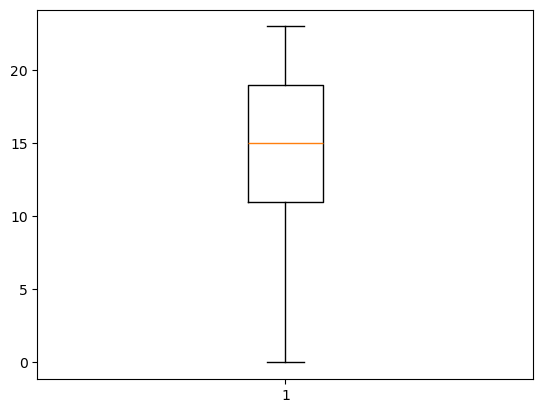

In [48]:
# Find and show the hourly trends in taxi pickups

dfsample['pickup_hour'].value_counts()

#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(dfsample.pickup_hour)
plt.show()



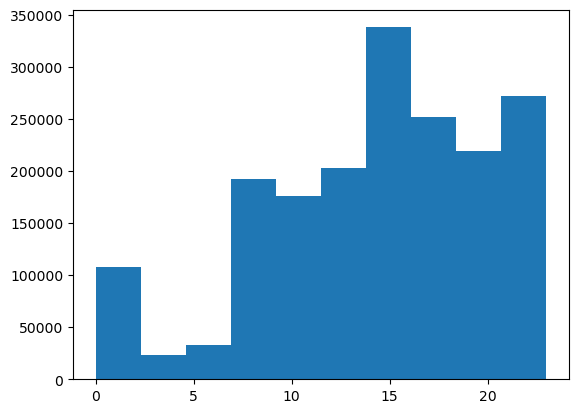

In [50]:
plt.hist(dfsample.pickup_hour)
plt.show()

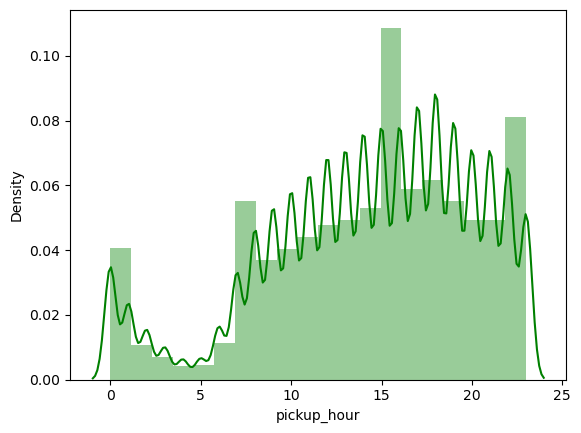

In [52]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

sns.distplot(dfsample.pickup_hour,bins=20, color="g")
plt.show()

In [114]:
#Taking backup of sample data
#dfsample.to_parquet('/Users/manojaaryan/Desktop/Upgrad/case_study1/Datasets and Dictionary/Sample/sample2.parquet')
dfsample = pd.read_parquet("/Users/manojaaryan/Desktop/Upgrad/case_study1/Datasets and Dictionary/Sample/sample2.parquet")

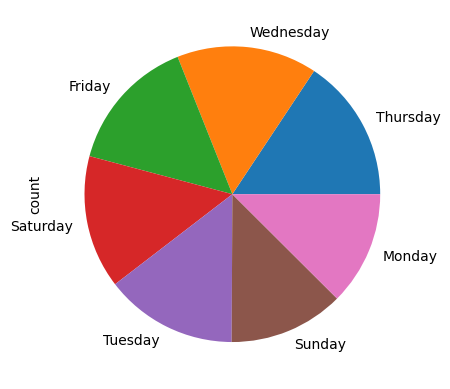

In [116]:
# Find and show the daily trends in taxi pickups (days of the week)

dfsample.day_of_week.value_counts().plot.pie()
plt.show()
#sns.distplot(dfsample.day_of_week,bins=20, color="g")
#plt.show()

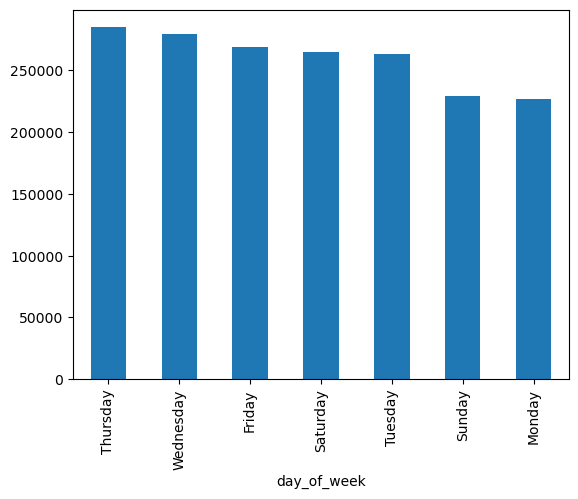

In [60]:
dfsample.day_of_week.value_counts().plot.bar()
plt.show()

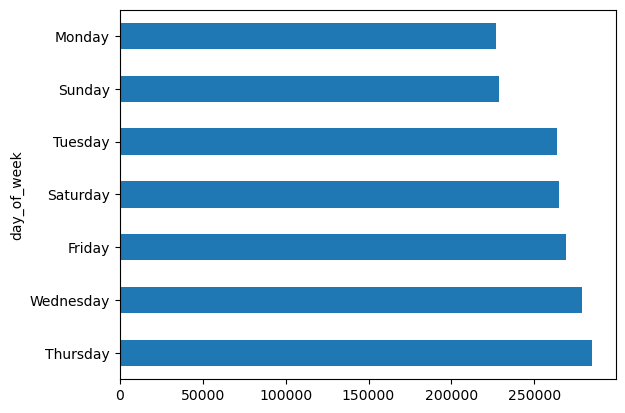

In [62]:
dfsample.day_of_week.value_counts().plot.barh()
plt.show()

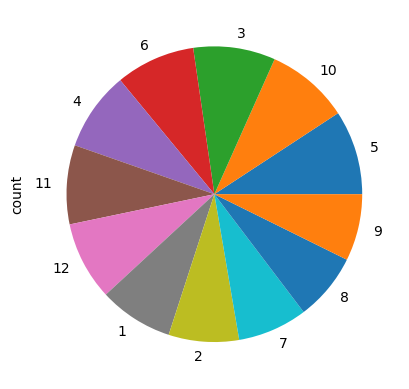

In [64]:
# Show the monthly trends in pickups

dfsample.month.value_counts().plot.pie()
plt.show()

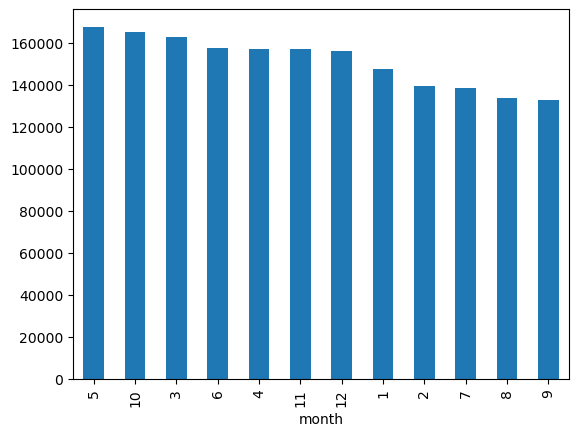

In [66]:
dfsample.month.value_counts().plot.bar()
plt.show()

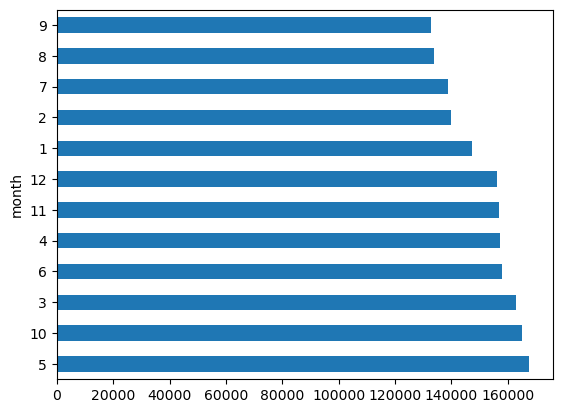

In [68]:
dfsample.month.value_counts().plot.barh()
plt.show()

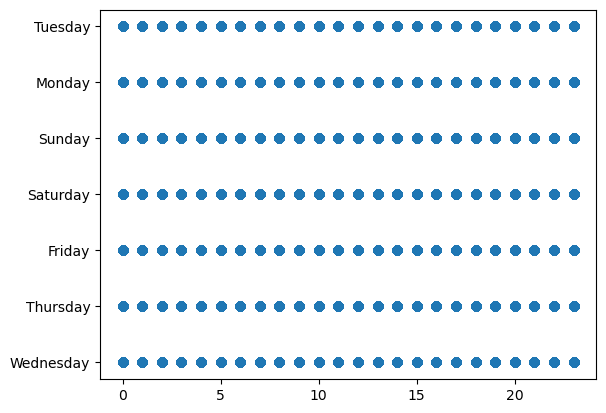

In [82]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

#sns.jointplot(dfsample.month, dfsample.pickup_hour, kind="reg")
#plt.show()

plt.scatter(dfsample.pickup_hour, dfsample.day_of_week)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [119]:
# Analyse the above parameters
nan_columns = dfsample.isnull().any()
print(nan_columns)
#This shows none of the column contains Nan Value. 

VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count          False
trip_distance            False
RatecodeID               False
store_and_fwd_flag       False
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge     False
Airport_Fee              False
pickup_hour              False
day_of_week              False
month                    False
trip_duration            False
dtype: bool


In [121]:
dfsample
#dfsample = dfsample[~(dfsample['fare_amount'] == 0)]
dfsample[(dfsample['fare_amount'] == 0) | (dfsample['fare_amount'] < 0)]
#dfsample[dfsample['tip_amount'] < 0]
#dfsample[dfsample['total_amount'] < 0]
#dfsample[dfsample['trip_distance'] < 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
9356            1  2023-02-02 14:23:01   2023-02-02 14:49:15              1.0   
15114           1  2023-02-03 12:08:18   2023-02-03 12:08:47              1.0   
15740           1  2023-02-03 14:10:08   2023-02-03 14:11:08              1.0   
21265           1  2023-02-04 15:08:24   2023-02-04 15:16:41              0.0   
31255           1  2023-02-07 10:21:51   2023-02-07 10:22:16              1.0   
...           ...                  ...                   ...              ...   
1876587         2  2023-05-28 10:58:03   2023-05-28 11:08:40              1.0   
1877322         1  2023-05-28 13:54:23   2023-05-28 13:55:36              2.0   
1878307         2  2023-05-29 04:20:24   2023-05-29 04:20:35              1.0   
1881291         1  2023-05-29 21:36:23   2023-05-29 21:36:50              0.0   
1885512         2  2023-05-30 19:35:27   2023-05-30 20:15:15              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
9356             11.40         1.0                  Y           162   
15114            10.30         5.0                  N           265   
15740             0.10         5.0                  N           161   
21265             5.40         1.0                  N           197   
31255             6.80         1.0                  N           132   
...                ...         ...                ...           ...   
1876587           1.87         1.0                  N           113   
1877322          23.40         5.0                  N           265   
1878307           0.06         1.0                  N           164   
1881291           1.20         5.0                  N           265   
1885512          17.65         2.0                  N           132   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
9356              138             3  ...         0.0           0.0   
15114             265             2  ...         0.0           0.0   
15740             163             4  ...         0.0           0.0   
21265             132             1  ...       110.0           0.0   
31255             132             2  ...         0.0           0.0   
...               ...           ...  ...         ...           ...   
1876587           164             2  ...         0.0           0.0   
1877322           265             4  ...         0.0           0.0   
1878307           161             2  ...         0.0           0.0   
1881291           265             1  ...        59.0           0.0   
1885512           144             2  ...         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
9356                       0.0          0.00                   0.0   
15114                      1.0          1.00                   0.0   
15740                      1.0          1.00                   0.0   
21265                      1.0        111.00                   0.0   
31255                      0.0          0.00                   0.0   
...                        ...           ...                   ...   
1876587                    1.0          4.00                   2.5   
1877322                    1.0          1.00                   0.0   
1878307                    1.0          4.00                   2.5   
1881291                    1.0         60.00                   0.0   
1885512                    1.0          5.75                   2.5   

         Airport_Fee  pickup_hour  day_of_week  month   trip_duration  
9356            0.00           14     Thursday      2 0 days 00:26:14  
15114           0.00           12       Friday      2 0 days 00:00:29  
15740           0.00           14       Friday      2 0 days 00:01:00  
21265           0.00           15     Saturday      2 0 days 00:08:17  
31255           0.00           10      Tuesday      2 0 days 00:00:25  
...              ...          ...          ...    ...             ...

In [123]:
#Checking for zero or negative tipe amount, however zero tip amount is fine hence not going to remove the zero tip
##
dfsample[(dfsample['tip_amount'] == 0) | (dfsample['tip_amount'] < 0)]
## Didn't find any record with negative tip amount
dfsample[(dfsample['tip_amount'] < 0)]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_Fee, pickup_hour, day_of_week, month, trip_duration]
Index: []

[0 rows x 23 columns]

In [125]:
#Checking for zero or negative total amount, however zero tip amount is fine hence not going to remove the zero tip
## record found
dfsample[(dfsample['total_amount'] == 0) | (dfsample['total_amount'] < 0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
9356            1  2023-02-02 14:23:01   2023-02-02 14:49:15              1.0   
31255           1  2023-02-07 10:21:51   2023-02-07 10:22:16              1.0   
42363           1  2023-02-09 13:39:19   2023-02-09 13:41:32              0.0   
82803           1  2023-02-16 14:48:44   2023-02-16 14:53:22              1.0   
86932           1  2023-02-17 21:08:12   2023-02-17 21:54:18              1.0   
...           ...                  ...                   ...              ...   
1706829         1  2023-07-29 00:48:21   2023-07-29 00:51:05              1.0   
1825036         1  2023-05-19 11:16:33   2023-05-19 11:49:15              1.0   
1825752         1  2023-05-19 13:43:17   2023-05-19 13:54:03              1.0   
1847643         1  2023-05-23 11:03:03   2023-05-23 11:07:15              1.0   
1858729         1  2023-05-25 14:32:58   2023-05-25 14:34:57              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
9356              11.4         1.0                  Y           162   
31255              6.8         1.0                  N           132   
42363              0.3         1.0                  N           142   
82803              0.6         1.0                  N           170   
86932             16.1         1.0                  Y           209   
...                ...         ...                ...           ...   
1706829            0.4         1.0                  N            79   
1825036            7.0         1.0                  Y            87   
1825752            1.5         1.0                  N           238   
1847643            0.4         1.0                  N            75   
1858729            3.3         1.0                  N           219   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
9356              138             3  ...         0.0           0.0   
31255             132             2  ...         0.0           0.0   
42363             142             4  ...         0.0           0.0   
82803             100             4  ...         0.0           0.0   
86932             128             4  ...         0.0           0.0   
...               ...           ...  ...         ...           ...   
1706829           232             3  ...         0.0           0.0   
1825036           163             4  ...         0.0           0.0   
1825752            75             4  ...         0.0           0.0   
1847643           236             3  ...         0.0           0.0   
1858729           219             3  ...         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
9356                       0.0           0.0                   0.0   
31255                      0.0           0.0                   0.0   
42363                      0.0           0.0                   0.0   
82803                      0.0           0.0                   0.0   
86932                      0.0           0.0                   0.0   
...                        ...           ...                   ...   
1706829                    0.0           0.0                   0.0   
1825036                    0.0           0.0                   0.0   
1825752                    0.0           0.0                   0.0   
1847643                    0.0           0.0                   0.0   
1858729                    0.0           0.0                   0.0   

         Airport_Fee  pickup_hour  day_of_week  month   trip_duration  
9356             0.0           14     Thursday      2 0 days 00:26:14  
31255            0.0           10      Tuesday      2 0 days 00:00:25  
42363            0.0           13     Thursday      2 0 days 00:02:13  
82803            0.0           14     Thursday      2 0 days 00:04:38  
86932            0.0           21       Friday      2 0 days 00:46:06  
...              ...          ...          ...    ...             ...

In [131]:
#Checking for zero or negative trip distance, found some records, hence removing from the DF
dfsample[(dfsample['trip_distance'] == 0) | (dfsample['trip_distance'] < 0)]

#dfsample =dfsample[~(dfsample['trip_distance'] == 0) | (dfsample['trip_distance'] < 0)]
#dfsample[(dfsample['trip_distance'] == 0) | (dfsample['trip_distance'] < 0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
179             2  2023-02-01 16:50:54   2023-02-01 17:26:16              1.0   
193             2  2023-02-01 16:49:13   2023-02-01 16:49:38              1.0   
256             2  2023-02-01 16:25:30   2023-02-01 16:25:40              1.0   
280             1  2023-02-01 16:14:05   2023-02-01 16:14:19              1.0   
594             2  2023-02-01 17:48:27   2023-02-01 17:53:01              3.0   
...           ...                  ...                   ...              ...   
1891899         1  2023-05-31 21:06:04   2023-05-31 21:20:54              1.0   
1891908         2  2023-05-31 21:22:38   2023-05-31 21:37:04              1.0   
1891946         1  2023-05-31 21:53:35   2023-05-31 21:53:35              2.0   
1892046         1  2023-05-31 21:41:28   2023-05-31 21:41:40              1.0   
1892186         2  2023-05-31 21:06:31   2023-05-31 21:11:01              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
179                0.0         1.0                  N           161   
193                0.0         1.0                  N           238   
256                0.0         1.0                  N           193   
280                0.0         1.0                  N           145   
594                0.0         1.0                  N           238   
...                ...         ...                ...           ...   
1891899            0.0         1.0                  N            43   
1891908            0.0         1.0                  N           238   
1891946            0.0         1.0                  N           230   
1892046            0.0         1.0                  N           132   
1892186            0.0         1.0                  N           236   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
179                88             1  ...        2.00           0.0   
193               238             3  ...        0.00           0.0   
256               193             2  ...        0.00           0.0   
280               145             2  ...        0.00           0.0   
594               239             1  ...        2.46           0.0   
...               ...           ...  ...         ...           ...   
1891899           143             1  ...        0.00           0.0   
1891908           143             1  ...        3.56           0.0   
1891946           264             2  ...        0.00           0.0   
1892046           132             2  ...        0.00           0.0   
1892186           263             1  ...        2.16           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
179                        1.0         36.00                   2.5   
193                        1.0          9.50                   2.5   
256                        1.0          7.00                   0.0   
280                        0.3          5.80                   0.0   
594                        1.0         14.76                   2.5   
...                        ...           ...                   ...   
1891899                    1.0         18.70                   0.0   
1891908                    1.0         21.36                   2.5   
1891946                    1.0          8.00                   2.5   
1892046                    1.0          7.25                   0.0   
1892186                    1.0         12.96                   2.5   

         Airport_Fee  pickup_hour  day_of_week  month   trip_duration  
179             0.00           16    Wednesday      2 0 days 00:35:22  
193             0.00           16    Wednesday      2 0 days 00:00:25  
256             0.00           16    Wednesday      2 0 days 00:00:10  
280             0.00           16    Wednesday      2 0 days 00:00:14  
594             0.00           17    Wednesday      2 0 days 00:04:34  
...              ...          ...          ...    ...             ...

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [ ]:
##Yes we can create new Df for non-zero values, as these params might be valid such as zero tip amount is pretty much validated scenario.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [129]:
# Create a df with non zero entries for the selected parameters.

dfsample_non_zero_fare_amount = dfsample[~(dfsample['fare_amount'] == 0) | (dfsample['fare_amount'] < 0)]
dfsample_non_zero_fare_amount

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-02-01 00:14:06   2023-02-01 00:19:52              3.0   
1               1  2023-02-01 00:54:09   2023-02-01 01:13:13              1.0   
2               2  2023-02-01 00:14:36   2023-02-01 00:59:16              1.0   
3               1  2023-02-01 00:49:25   2023-02-01 00:53:12              1.0   
4               1  2023-02-01 00:16:02   2023-02-01 00:22:02              1.0   
...           ...                  ...                   ...              ...   
1892242         2  2023-05-31 21:32:07   2023-05-31 21:43:56              1.0   
1892243         2  2023-05-31 21:25:41   2023-05-31 21:42:50              1.0   
1892244         2  2023-05-31 21:11:35   2023-05-31 21:27:23              4.0   
1892245         2  2023-05-31 21:32:01   2023-05-31 21:45:53              1.0   
1892246         2  2023-05-31 21:41:50   2023-05-31 21:59:27              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 1.25         1.0                  N           234   
1                 5.00         1.0                  N            48   
2                24.04         1.0                  N           114   
3                 0.60         1.0                  N           246   
4                 0.90         1.0                  N           114   
...                ...         ...                ...           ...   
1892242           2.54         1.0                  N            43   
1892243           4.32         1.0                  N           163   
1892244           2.56         1.0                  N            68   
1892245           6.17         1.0                  N           246   
1892246           3.12         1.0                  N           142   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
0                 114             1  ...        6.12           0.0   
1                  87             1  ...        0.00           0.0   
2                 121             1  ...        6.00           0.0   
3                  68             1  ...        1.00           0.0   
4                 148             1  ...        2.55           0.0   
...               ...           ...  ...         ...           ...   
1892242            75             1  ...        4.80           0.0   
1892243           112             1  ...        2.69           0.0   
1892244           143             1  ...        3.20           0.0   
1892245           152             1  ...        7.00           0.0   
1892246           107             1  ...        5.85           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          1.0         19.72                   2.5   
1                          1.0         28.30                   2.5   
2                          1.0        102.20                   2.5   
3                          1.0         11.80                   2.5   
4                          1.0         15.45                   2.5   
...                        ...           ...                   ...   
1892242                    1.0         24.00                   2.5   
1892243                    1.0         29.59                   2.5   
1892244                    1.0         24.50                   2.5   
1892245                    1.0         38.10                   2.5   
1892246                    1.0         29.25                   2.5   

         Airport_Fee  pickup_hour  day_of_week  month   trip_duration  
0                0.0            0    Wednesday      2 0 days 00:05:46  
1                0.0            0    Wednesday      2 0 days 00:19:04  
2                0.0            0    Wednesday      2 0 days 00:44:40  
3                0.0            0    Wednesday      2 0 days 00:03:47  
4                0.0            0    Wednesday      2 0 days 00:06:00  
...              ...          ...          ...    ...             ...

In [137]:
dfsample_non_zero_trip_distance = dfsample[~(dfsample['trip_distance'] == 0) | (dfsample['trip_distance'] < 0)]
dfsample_non_zero_trip_distance

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-02-01 00:14:06   2023-02-01 00:19:52              3.0   
1               1  2023-02-01 00:54:09   2023-02-01 01:13:13              1.0   
2               2  2023-02-01 00:14:36   2023-02-01 00:59:16              1.0   
3               1  2023-02-01 00:49:25   2023-02-01 00:53:12              1.0   
4               1  2023-02-01 00:16:02   2023-02-01 00:22:02              1.0   
...           ...                  ...                   ...              ...   
1892242         2  2023-05-31 21:32:07   2023-05-31 21:43:56              1.0   
1892243         2  2023-05-31 21:25:41   2023-05-31 21:42:50              1.0   
1892244         2  2023-05-31 21:11:35   2023-05-31 21:27:23              4.0   
1892245         2  2023-05-31 21:32:01   2023-05-31 21:45:53              1.0   
1892246         2  2023-05-31 21:41:50   2023-05-31 21:59:27              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 1.25         1.0                  N           234   
1                 5.00         1.0                  N            48   
2                24.04         1.0                  N           114   
3                 0.60         1.0                  N           246   
4                 0.90         1.0                  N           114   
...                ...         ...                ...           ...   
1892242           2.54         1.0                  N            43   
1892243           4.32         1.0                  N           163   
1892244           2.56         1.0                  N            68   
1892245           6.17         1.0                  N           246   
1892246           3.12         1.0                  N           142   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
0                 114             1  ...        6.12           0.0   
1                  87             1  ...        0.00           0.0   
2                 121             1  ...        6.00           0.0   
3                  68             1  ...        1.00           0.0   
4                 148             1  ...        2.55           0.0   
...               ...           ...  ...         ...           ...   
1892242            75             1  ...        4.80           0.0   
1892243           112             1  ...        2.69           0.0   
1892244           143             1  ...        3.20           0.0   
1892245           152             1  ...        7.00           0.0   
1892246           107             1  ...        5.85           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          1.0         19.72                   2.5   
1                          1.0         28.30                   2.5   
2                          1.0        102.20                   2.5   
3                          1.0         11.80                   2.5   
4                          1.0         15.45                   2.5   
...                        ...           ...                   ...   
1892242                    1.0         24.00                   2.5   
1892243                    1.0         29.59                   2.5   
1892244                    1.0         24.50                   2.5   
1892245                    1.0         38.10                   2.5   
1892246                    1.0         29.25                   2.5   

         Airport_Fee  pickup_hour  day_of_week  month   trip_duration  
0                0.0            0    Wednesday      2 0 days 00:05:46  
1                0.0            0    Wednesday      2 0 days 00:19:04  
2                0.0            0    Wednesday      2 0 days 00:44:40  
3                0.0            0    Wednesday      2 0 days 00:03:47  
4                0.0            0    Wednesday      2 0 days 00:06:00  
...              ...          ...          ...    ...             ...

In [143]:
dfsample_non_zero_total_amount = dfsample[~(dfsample['total_amount'] == 0) | (dfsample['total_amount'] < 0)]
dfsample_non_zero_total_amount

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-02-01 00:14:06   2023-02-01 00:19:52              3.0   
1               1  2023-02-01 00:54:09   2023-02-01 01:13:13              1.0   
2               2  2023-02-01 00:14:36   2023-02-01 00:59:16              1.0   
3               1  2023-02-01 00:49:25   2023-02-01 00:53:12              1.0   
4               1  2023-02-01 00:16:02   2023-02-01 00:22:02              1.0   
...           ...                  ...                   ...              ...   
1892242         2  2023-05-31 21:32:07   2023-05-31 21:43:56              1.0   
1892243         2  2023-05-31 21:25:41   2023-05-31 21:42:50              1.0   
1892244         2  2023-05-31 21:11:35   2023-05-31 21:27:23              4.0   
1892245         2  2023-05-31 21:32:01   2023-05-31 21:45:53              1.0   
1892246         2  2023-05-31 21:41:50   2023-05-31 21:59:27              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 1.25         1.0                  N           234   
1                 5.00         1.0                  N            48   
2                24.04         1.0                  N           114   
3                 0.60         1.0                  N           246   
4                 0.90         1.0                  N           114   
...                ...         ...                ...           ...   
1892242           2.54         1.0                  N            43   
1892243           4.32         1.0                  N           163   
1892244           2.56         1.0                  N            68   
1892245           6.17         1.0                  N           246   
1892246           3.12         1.0                  N           142   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
0                 114             1  ...        6.12           0.0   
1                  87             1  ...        0.00           0.0   
2                 121             1  ...        6.00           0.0   
3                  68             1  ...        1.00           0.0   
4                 148             1  ...        2.55           0.0   
...               ...           ...  ...         ...           ...   
1892242            75             1  ...        4.80           0.0   
1892243           112             1  ...        2.69           0.0   
1892244           143             1  ...        3.20           0.0   
1892245           152             1  ...        7.00           0.0   
1892246           107             1  ...        5.85           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          1.0         19.72                   2.5   
1                          1.0         28.30                   2.5   
2                          1.0        102.20                   2.5   
3                          1.0         11.80                   2.5   
4                          1.0         15.45                   2.5   
...                        ...           ...                   ...   
1892242                    1.0         24.00                   2.5   
1892243                    1.0         29.59                   2.5   
1892244                    1.0         24.50                   2.5   
1892245                    1.0         38.10                   2.5   
1892246                    1.0         29.25                   2.5   

         Airport_Fee  pickup_hour  day_of_week  month   trip_duration  
0                0.0            0    Wednesday      2 0 days 00:05:46  
1                0.0            0    Wednesday      2 0 days 00:19:04  
2                0.0            0    Wednesday      2 0 days 00:44:40  
3                0.0            0    Wednesday      2 0 days 00:03:47  
4                0.0            0    Wednesday      2 0 days 00:06:00  
...              ...          ...          ...    ...             ...

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [149]:
# Group data by month and analyse monthly revenue

print(dfsample.groupby('month')['total_amount'].sum())

month
1     4022687.92
2     3801953.74
3     4580997.76
4     4501215.83
5     4900675.42
6     4615108.26
7     4013999.62
8     3901632.14
9     3989888.17
10    4911412.14
11    4568899.01
12    4553083.07
Name: total_amount, dtype: float64


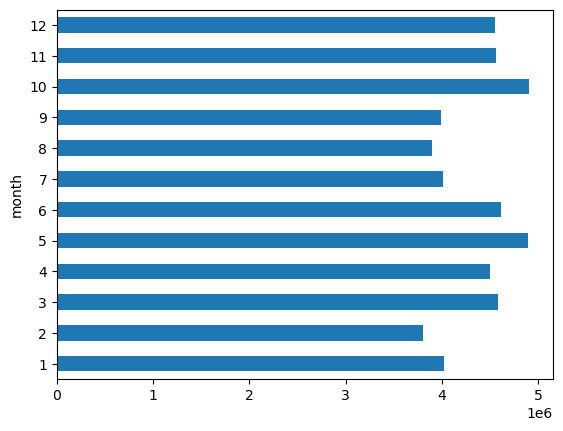

In [151]:
dfsample.groupby('month')['total_amount'].sum().plot.barh()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [153]:
# Calculate proportion of each quarter
##created another cloumn in data frame with quarter

dfsample['quarter'] = dfsample['tpep_pickup_datetime'].dt.quarter
dfsample



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-02-01 00:14:06   2023-02-01 00:19:52              3.0   
1               1  2023-02-01 00:54:09   2023-02-01 01:13:13              1.0   
2               2  2023-02-01 00:14:36   2023-02-01 00:59:16              1.0   
3               1  2023-02-01 00:49:25   2023-02-01 00:53:12              1.0   
4               1  2023-02-01 00:16:02   2023-02-01 00:22:02              1.0   
...           ...                  ...                   ...              ...   
1892242         2  2023-05-31 21:32:07   2023-05-31 21:43:56              1.0   
1892243         2  2023-05-31 21:25:41   2023-05-31 21:42:50              1.0   
1892244         2  2023-05-31 21:11:35   2023-05-31 21:27:23              4.0   
1892245         2  2023-05-31 21:32:01   2023-05-31 21:45:53              1.0   
1892246         2  2023-05-31 21:41:50   2023-05-31 21:59:27              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 1.25         1.0                  N           234   
1                 5.00         1.0                  N            48   
2                24.04         1.0                  N           114   
3                 0.60         1.0                  N           246   
4                 0.90         1.0                  N           114   
...                ...         ...                ...           ...   
1892242           2.54         1.0                  N            43   
1892243           4.32         1.0                  N           163   
1892244           2.56         1.0                  N            68   
1892245           6.17         1.0                  N           246   
1892246           3.12         1.0                  N           142   

         DOLocationID  payment_type  ...  tolls_amount  improvement_surcharge  \
0                 114             1  ...           0.0                    1.0   
1                  87             1  ...           0.0                    1.0   
2                 121             1  ...           0.0                    1.0   
3                  68             1  ...           0.0                    1.0   
4                 148             1  ...           0.0                    1.0   
...               ...           ...  ...           ...                    ...   
1892242            75             1  ...           0.0                    1.0   
1892243           112             1  ...           0.0                    1.0   
1892244           143             1  ...           0.0                    1.0   
1892245           152             1  ...           0.0                    1.0   
1892246           107             1  ...           0.0                    1.0   

         total_amount  congestion_surcharge  Airport_Fee  pickup_hour  \
0               19.72                   2.5          0.0            0   
1               28.30                   2.5          0.0            0   
2              102.20                   2.5          0.0            0   
3               11.80                   2.5          0.0            0   
4               15.45                   2.5          0.0            0   
...               ...                   ...          ...          ...   
1892242         24.00                   2.5          0.0           21   
1892243         29.59                   2.5          0.0           21   
1892244         24.50                   2.5          0.0           21   
1892245         38.10                   2.5          0.0           21   
1892246         29.25                   2.5          0.0           21   

         day_of_week  month   trip_duration  quarter  
0          Wednesday      2 0 days 00:05:46        1  
1          Wednesday      2 0 days 00:19:04        1  
2          Wednesday      2 0 days 00:44:40        1  
3          Wednesday      2 0 days 00:03:47        1  
4          Wednesday      2 0 days 00:06:00        1  
...

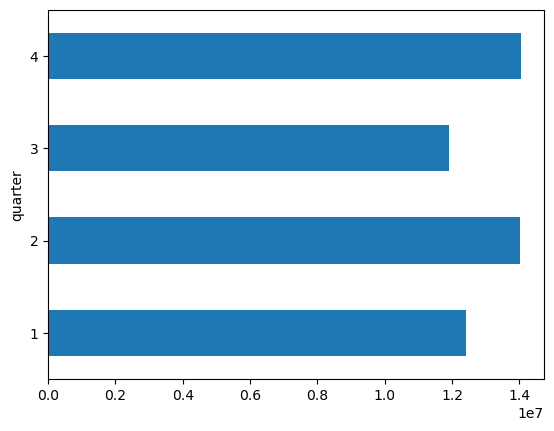

In [155]:
dfsample.groupby('quarter')['total_amount'].sum().plot.barh()
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

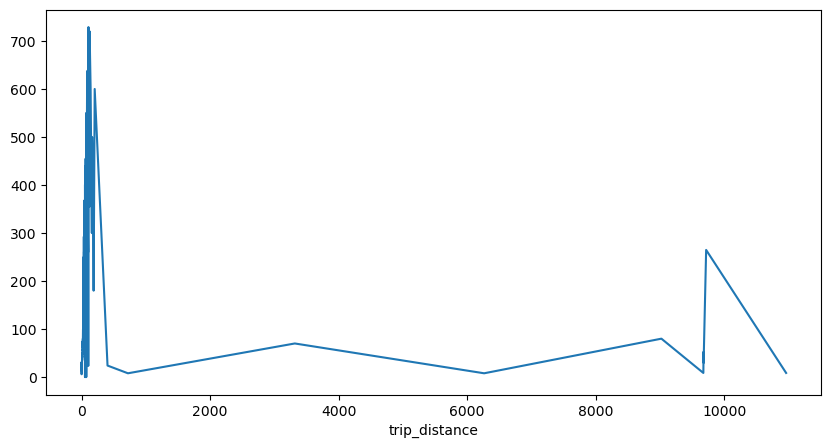

In [159]:
# Show how trip fare is affected by distance

plt.figure(figsize=[10,5])
dfsample.groupby(['trip_distance'])['fare_amount'].mean().plot()
plt.show()

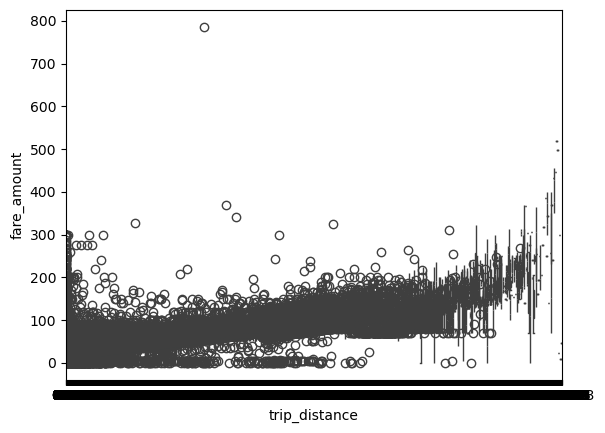

In [169]:
sns.boxplot(x = dfsample['trip_distance'],y=dfsample['fare_amount'])
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

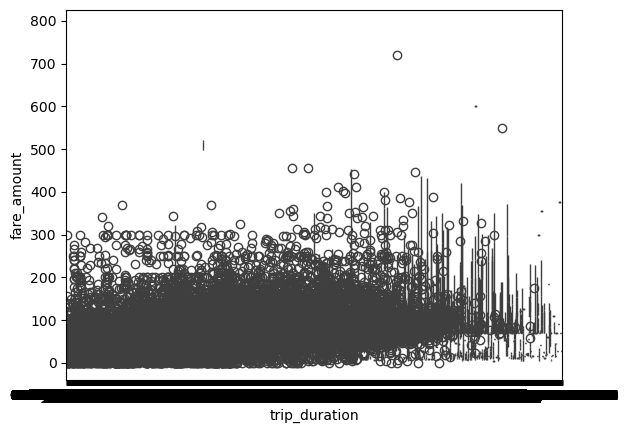

In [171]:
# Show relationship between fare and trip duration
sns.boxplot(x = dfsample['trip_duration'],y=dfsample['fare_amount'])
plt.show()


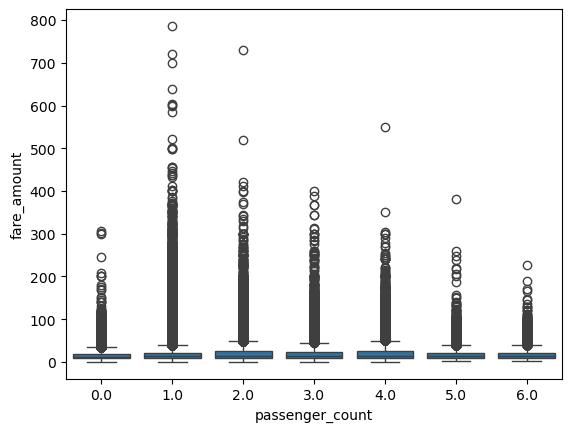

In [174]:
# Show relationship between fare and number of passengers

sns.boxplot(x = dfsample['passenger_count'],y=dfsample['fare_amount'])
plt.show()

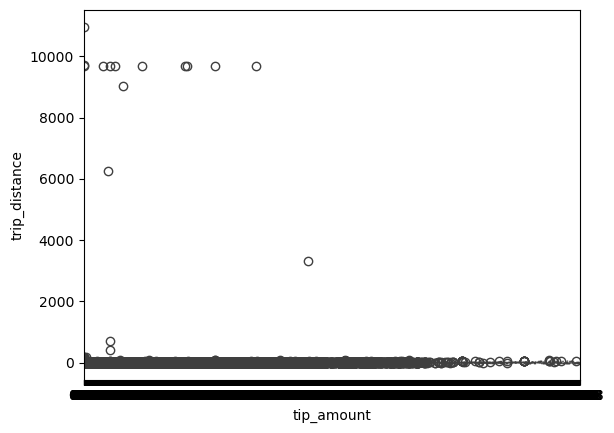

In [176]:
# Show relationship between tip and trip distance

sns.boxplot(x = dfsample['tip_amount'],y=dfsample['trip_distance'])
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

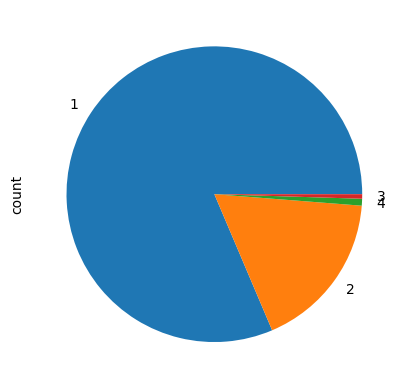

count    1.816724e+06
mean     1.205954e+00
std      4.671849e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      4.000000e+00
Name: payment_type, dtype: float64

In [184]:
# Analyse the distribution of different payment types (payment_type).


dfsample.payment_type.value_counts().plot.pie()
plt.show()

dfsample.payment_type.describe()

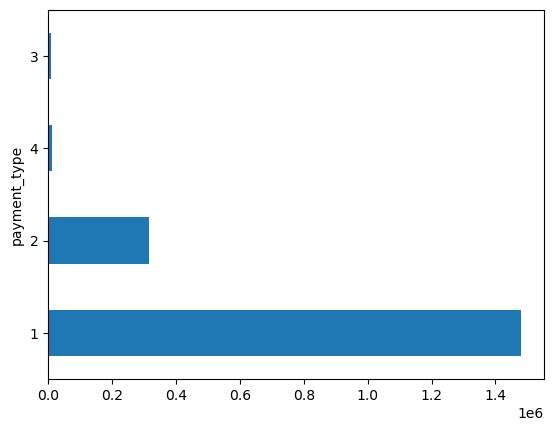

In [189]:

dfsample.payment_type.value_counts().plot.barh()
plt.show()

In [186]:
dfsample.payment_type.value_counts()

payment_type
1    1478675
2     315535
4      13598
3       8916
Name: count, dtype: int64

In [9]:
dfsample = 
#.to_parquet('/Users/manojaaryan/Desktop/Upgrad/case_study1/Datasets and Dictionary/Sample/sample3.parquet')


NameError: name 'dfsample' is not defined

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



In [ ]:
#MAximum payments was done using credit card.
## Cash is on second place as payment method.
##8916 records where no charge was collected,
## 13598 records were disputed.


In [195]:
dfsample

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-02-01 00:14:06   2023-02-01 00:19:52              3.0   
1               1  2023-02-01 00:54:09   2023-02-01 01:13:13              1.0   
2               2  2023-02-01 00:14:36   2023-02-01 00:59:16              1.0   
3               1  2023-02-01 00:49:25   2023-02-01 00:53:12              1.0   
4               1  2023-02-01 00:16:02   2023-02-01 00:22:02              1.0   
...           ...                  ...                   ...              ...   
1892242         2  2023-05-31 21:32:07   2023-05-31 21:43:56              1.0   
1892243         2  2023-05-31 21:25:41   2023-05-31 21:42:50              1.0   
1892244         2  2023-05-31 21:11:35   2023-05-31 21:27:23              4.0   
1892245         2  2023-05-31 21:32:01   2023-05-31 21:45:53              1.0   
1892246         2  2023-05-31 21:41:50   2023-05-31 21:59:27              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 1.25         1.0                  N           234   
1                 5.00         1.0                  N            48   
2                24.04         1.0                  N           114   
3                 0.60         1.0                  N           246   
4                 0.90         1.0                  N           114   
...                ...         ...                ...           ...   
1892242           2.54         1.0                  N            43   
1892243           4.32         1.0                  N           163   
1892244           2.56         1.0                  N            68   
1892245           6.17         1.0                  N           246   
1892246           3.12         1.0                  N           142   

         DOLocationID  payment_type  ...  tolls_amount  improvement_surcharge  \
0                 114             1  ...           0.0                    1.0   
1                  87             1  ...           0.0                    1.0   
2                 121             1  ...           0.0                    1.0   
3                  68             1  ...           0.0                    1.0   
4                 148             1  ...           0.0                    1.0   
...               ...           ...  ...           ...                    ...   
1892242            75             1  ...           0.0                    1.0   
1892243           112             1  ...           0.0                    1.0   
1892244           143             1  ...           0.0                    1.0   
1892245           152             1  ...           0.0                    1.0   
1892246           107             1  ...           0.0                    1.0   

         total_amount  congestion_surcharge  Airport_Fee  pickup_hour  \
0               19.72                   2.5          0.0            0   
1               28.30                   2.5          0.0            0   
2              102.20                   2.5          0.0            0   
3               11.80                   2.5          0.0            0   
4               15.45                   2.5          0.0            0   
...               ...                   ...          ...          ...   
1892242         24.00                   2.5          0.0           21   
1892243         29.59                   2.5          0.0           21   
1892244         24.50                   2.5          0.0           21   
1892245         38.10                   2.5          0.0           21   
1892246         29.25                   2.5          0.0           21   

         day_of_week  month   trip_duration  quarter  
0          Wednesday      2 0 days 00:05:46        1  
1          Wednesday      2 0 days 00:19:04        1  
2          Wednesday      2 0 days 00:44:40        1  
3          Wednesday      2 0 days 00:03:47        1  
4          Wednesday      2 0 days 00:06:00        1  
...

In [193]:
dfsample.to_parquet('/Users/manojaaryan/Desktop/Upgrad/case_study1/Datasets and Dictionary/Sample/sample3.parquet')

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [1]:
# !pip install geopandas
import geopandas as gpd

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [3]:
 import geopandas as gpd
import fiona

# Read the shapefile using geopandas
zones = gpd.read_file('/Users/manojaaryan/Desktop/Upgrad/case_study1/Datasets and Dictionary/taxi_zones/taxi_zones.shp')# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.770 256767.698, 1026495.593 ...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.310 144283.336, 936046.565 14...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int64   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int64   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(2)
memory usage: 14.5+ KB
None


/opt/anaconda3/lib/python3.12/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

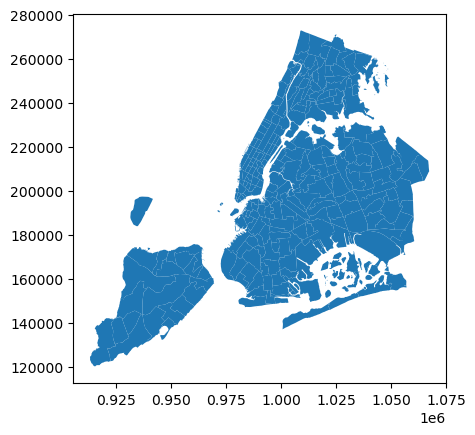

In [5]:
 print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [7]:
# Merge zones and trip records using locationID and PULocationID
import pandas as pd
import numpy as np
dfsample = pd.read_parquet("/Users/manojaaryan/Desktop/Upgrad/case_study1/Datasets and Dictionary/Sample/sample3.parquet")



merged_df = pd.merge(dfsample, zones, left_on='PULocationID', right_on='LocationID', how='left')


In [9]:
merged_df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-02-01 00:14:06   2023-02-01 00:19:52              3.0   
1               1  2023-02-01 00:54:09   2023-02-01 01:13:13              1.0   
2               2  2023-02-01 00:14:36   2023-02-01 00:59:16              1.0   
3               1  2023-02-01 00:49:25   2023-02-01 00:53:12              1.0   
4               1  2023-02-01 00:16:02   2023-02-01 00:22:02              1.0   
...           ...                  ...                   ...              ...   
1816781         2  2023-05-31 21:32:07   2023-05-31 21:43:56              1.0   
1816782         2  2023-05-31 21:25:41   2023-05-31 21:42:50              1.0   
1816783         2  2023-05-31 21:11:35   2023-05-31 21:27:23              4.0   
1816784         2  2023-05-31 21:32:01   2023-05-31 21:45:53              1.0   
1816785         2  2023-05-31 21:41:50   2023-05-31 21:59:27              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 1.25         1.0                  N           234   
1                 5.00         1.0                  N            48   
2                24.04         1.0                  N           114   
3                 0.60         1.0                  N           246   
4                 0.90         1.0                  N           114   
...                ...         ...                ...           ...   
1816781           2.54         1.0                  N            43   
1816782           4.32         1.0                  N           163   
1816783           2.56         1.0                  N            68   
1816784           6.17         1.0                  N           246   
1816785           3.12         1.0                  N           142   

         DOLocationID  payment_type  ...  month   trip_duration  quarter  \
0                 114             1  ...      2 0 days 00:05:46        1   
1                  87             1  ...      2 0 days 00:19:04        1   
2                 121             1  ...      2 0 days 00:44:40        1   
3                  68             1  ...      2 0 days 00:03:47        1   
4                 148             1  ...      2 0 days 00:06:00        1   
...               ...           ...  ...    ...             ...      ...   
1816781            75             1  ...      5 0 days 00:11:49        2   
1816782           112             1  ...      5 0 days 00:17:09        2   
1816783           143             1  ...      5 0 days 00:15:48        2   
1816784           152             1  ...      5 0 days 00:13:52        2   
1816785           107             1  ...      5 0 days 00:17:37        2   

         OBJECTID  Shape_Leng  Shape_Area                       zone  \
0           234.0    0.036072    0.000073                   Union Sq   
1            48.0    0.043747    0.000094               Clinton East   
2           114.0    0.031727    0.000047    Greenwich Village South   
3           246.0    0.069467    0.000281  West Chelsea/Hudson Yards   
4           114.0    0.031727    0.000047    Greenwich Village South   
...           ...         ...         ...                        ...   
1816781      43.0    0.099739    0.000380               Central Park   
1816782     163.0    0.034177    0.000041              Midtown North   
1816783      68.0    0.049337    0.000111               East Chelsea   
1816784     246.0    0.069467    0.000281  West Chelsea/Hudson Yards   
1816785     142.0    0.038176    0.000076        Lincoln Square East   

         LocationID    borough  \
0             234.0  Manhattan   
1              48.0  Manhattan   
2             114.0  Manhattan   
3             246.0  Manhattan   
4             114.0  Manhattan   
...             ...        ...   
1816781        43.0  Manhattan   
1816782       163.0  Manhattan   
1816783        68.0  Manhattan   
1816784       246.0  Manhattan   
1816785       142.0  Manhattan 

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [11]:
# Group data by location and calculate the number of trips

location_count = merged_df.groupby('LocationID')['LocationID'].sum()
#plt.show()

In [13]:
location_count1 = merged_df.groupby('LocationID').size()
location_count1

LocationID
1.0        213
2.0          2
3.0          6
4.0       1821
6.0         24
         ...  
259.0        9
260.0      327
261.0     9579
262.0    23557
263.0    34775
Length: 252, dtype: int64

In [15]:
# Convert Series to DataFrame
df = location_count1.to_frame()

# Reset the index
df = df.reset_index()

# Rename the index column (optional)
df = df.rename(columns={'index': 'new_index'})

In [17]:
df

LocationID      0
0           1.0    213
1           2.0      2
2           3.0      6
3           4.0   1821
4           6.0     24
..          ...    ...
247       259.0      9
248       260.0    327
249       261.0   9579
250       262.0  23557
251       263.0  34775

[252 rows x 2 columns]

In [32]:
#location_count = merged_df.groupby('LocationID')['LocationID'].sum()

In [38]:
# Store the result in a new DataFrame
#new_df = pd.DataFrame(location_count1)

# Reset the index (optional)
#new_df = new_df.reset_index()
#new_df.columns()

TypeError: 'Index' object is not callable

In [19]:
 #print(new_df.columns)

NameError: name 'new_df' is not defined

In [44]:
 #new_df.index.LocationID = ['location']


In [46]:
#new_df

LocationID
LocationID            
1.0              213.0
2.0                4.0
3.0               18.0
4.0             7284.0
6.0              144.0
...                ...
259.0           2331.0
260.0          85020.0
261.0        2500119.0
262.0        6171934.0
263.0        9145825.0

[252 rows x 1 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [21]:
# Merge trip counts back to the zones GeoDataFrame


merged_LOC_df = pd.merge(df, zones, left_on='LocationID', right_on='LocationID', how='left')

In [23]:


column_names = merged_LOC_df.columns.tolist()
print(column_names)


['LocationID', 0, 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'borough', 'geometry']


In [25]:
merged_LOC_df.rename(columns={0: 'count'}, inplace=True)

In [27]:
merged_LOC_df

LocationID  count  OBJECTID  Shape_Leng  Shape_Area  \
0           1.0    213         1    0.116357    0.000782   
1           2.0      2         2    0.433470    0.004866   
2           3.0      6         3    0.084341    0.000314   
3           4.0   1821         4    0.043567    0.000112   
4           6.0     24         6    0.150491    0.000606   
..          ...    ...       ...         ...         ...   
248       259.0      9       259    0.126750    0.000395   
249       260.0    327       260    0.133514    0.000422   
250       261.0   9579       261    0.027120    0.000034   
251       262.0  23557       262    0.049064    0.000122   
252       263.0  34775       263    0.037017    0.000066   

                        zone        borough  \
0             Newark Airport            EWR   
1                Jamaica Bay         Queens   
2    Allerton/Pelham Gardens          Bronx   
3              Alphabet City      Manhattan   
4    Arrochar/Fort Wadsworth  Staten Island   
..                       ...            ...   
248       Woodlawn/Wakefield          Bronx   
249                 Woodside         Queens   
250       World Trade Center      Manhattan   
251           Yorkville East      Manhattan   
252           Yorkville West      Manhattan   

                                              geometry  
0    POLYGON ((933100.918 192536.086, 933091.011 19...  
1    MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2    POLYGON ((1026308.770 256767.698, 1026495.593 ...  
3    POLYGON ((992073.467 203714.076, 992068.667 20...  
4    POLYGON ((966568.747 158679.855, 966615.256 15...  
..                                                 ...  
248  POLYGON ((1025414.782 270986.139, 1025138.624 ...  
249  POLYGON ((1011466.966 216463.005, 1011545.889 ...  
250  POLYGON ((980555.204 196138.486, 980570.792 19...  
251  MULTIPOLYGON (((999804.795 224498.527, 999824....  
252  POLYGON ((997493.323 220912.386, 997355.264 22...  

[253 rows x 8 columns]

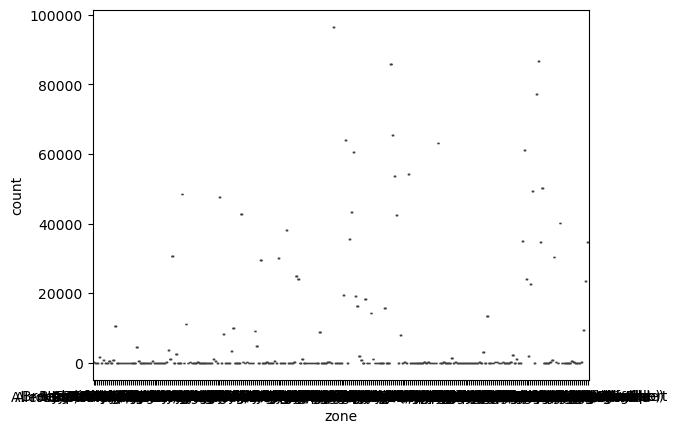

In [29]:
#import the necessary libraries
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

sns.boxplot(x = merged_LOC_df['zone'],y=merged_LOC_df['count'])
plt.show()

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

In [31]:
merged_LOC_df

LocationID  count  OBJECTID  Shape_Leng  Shape_Area  \
0           1.0    213         1    0.116357    0.000782   
1           2.0      2         2    0.433470    0.004866   
2           3.0      6         3    0.084341    0.000314   
3           4.0   1821         4    0.043567    0.000112   
4           6.0     24         6    0.150491    0.000606   
..          ...    ...       ...         ...         ...   
248       259.0      9       259    0.126750    0.000395   
249       260.0    327       260    0.133514    0.000422   
250       261.0   9579       261    0.027120    0.000034   
251       262.0  23557       262    0.049064    0.000122   
252       263.0  34775       263    0.037017    0.000066   

                        zone        borough  \
0             Newark Airport            EWR   
1                Jamaica Bay         Queens   
2    Allerton/Pelham Gardens          Bronx   
3              Alphabet City      Manhattan   
4    Arrochar/Fort Wadsworth  Staten Island   
..                       ...            ...   
248       Woodlawn/Wakefield          Bronx   
249                 Woodside         Queens   
250       World Trade Center      Manhattan   
251           Yorkville East      Manhattan   
252           Yorkville West      Manhattan   

                                              geometry  
0    POLYGON ((933100.918 192536.086, 933091.011 19...  
1    MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2    POLYGON ((1026308.770 256767.698, 1026495.593 ...  
3    POLYGON ((992073.467 203714.076, 992068.667 20...  
4    POLYGON ((966568.747 158679.855, 966615.256 15...  
..                                                 ...  
248  POLYGON ((1025414.782 270986.139, 1025138.624 ...  
249  POLYGON ((1011466.966 216463.005, 1011545.889 ...  
250  POLYGON ((980555.204 196138.486, 980570.792 19...  
251  MULTIPOLYGON (((999804.795 224498.527, 999824....  
252  POLYGON ((997493.323 220912.386, 997355.264 22...  

[253 rows x 8 columns]

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [33]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column = 'zone',
ax = ax,
legend = True)


<Axes: >

In [37]:
# can you try displaying the zones DF sorted by the number of trips?
merged_LOC_df_sorted= merged_LOC_df.sort_values(by ='count', ascending=False)
merged_LOC_df_sorted


LocationID  count  OBJECTID  Shape_Leng  Shape_Area  \
123       132.0  96525       132    0.245479    0.002038   
227       237.0  86728       237    0.042213    0.000096   
152       161.0  85754       161    0.035804    0.000072   
226       236.0  77336       236    0.044252    0.000103   
153       162.0  65472       162    0.035270    0.000048   
..          ...    ...       ...         ...         ...   
25         27.0      1        27    0.202509    0.001341   
106       115.0      1       115    0.116169    0.000373   
211       221.0      1       221    0.166218    0.000890   
43         46.0      1        46    0.134475    0.000926   
163       172.0      1       172    0.118476    0.000658   

                                    zone        borough  \
123                          JFK Airport         Queens   
227                Upper East Side South      Manhattan   
152                       Midtown Center      Manhattan   
226                Upper East Side North      Manhattan   
153                         Midtown East      Manhattan   
..                                   ...            ...   
25   Breezy Point/Fort Tilden/Riis Beach         Queens   
106                  Grymes Hill/Clifton  Staten Island   
211                            Stapleton  Staten Island   
43                           City Island          Bronx   
163               New Dorp/Midland Beach  Staten Island   

                                              geometry  
123  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
227  POLYGON ((993633.442 216961.016, 993507.232 21...  
152  POLYGON ((991081.026 214453.698, 990952.644 21...  
226  POLYGON ((995940.048 221122.920, 995812.322 22...  
153  POLYGON ((992224.354 214415.293, 992096.999 21...  
..                                                 ...  
25   POLYGON ((1021692.969 147138.664, 1021883.624 ...  
106  POLYGON ((961850.466 167915.309, 961831.926 16...  
211  POLYGON ((963349.728 171627.581, 963397.759 17...  
43   MULTIPOLYGON (((1043853.395 252845.891, 104386...  
163  POLYGON ((960204.812 146820.751, 960103.437 14...  

[253 rows x 8 columns]

<Axes: >

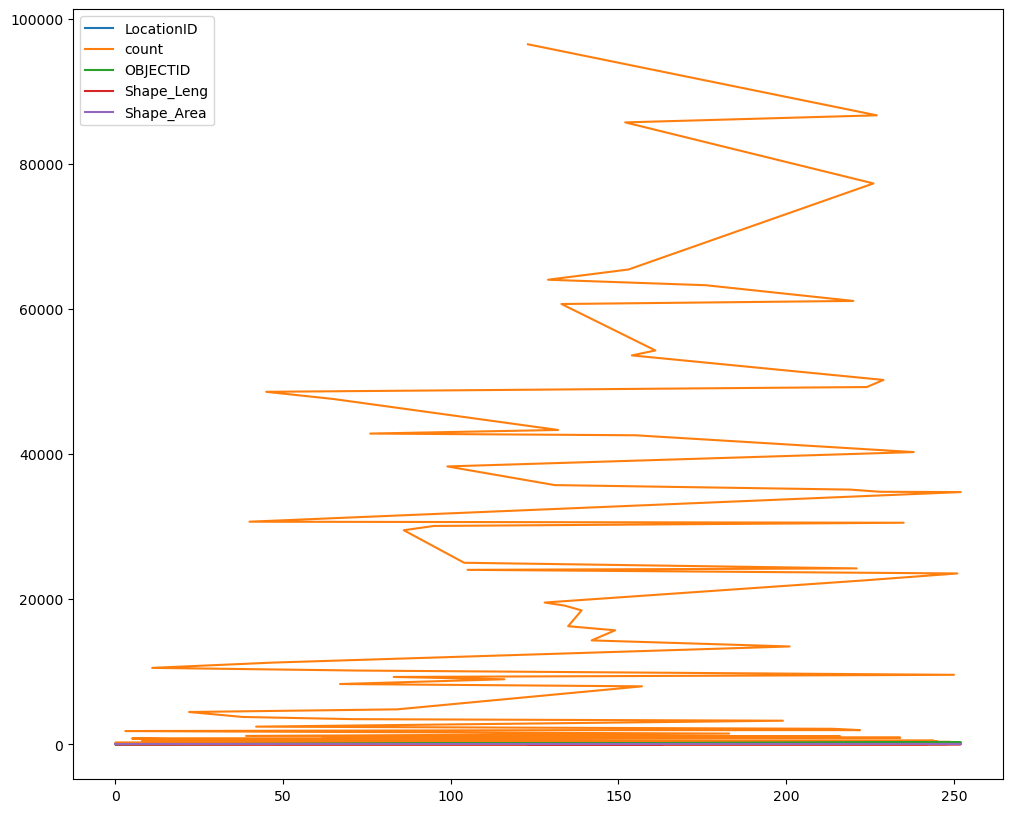

In [39]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
merged_LOC_df_sorted.plot(column = 'zone',
ax = ax,
legend = True)

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [43]:
# Find routes which have the slowest speeds at different times of the day

merged_LOC_df_sorted.describe()


LocationID         count    OBJECTID  Shape_Leng  Shape_Area
count  253.000000    253.000000  253.000000  253.000000  253.000000
mean   133.019763   7108.715415  133.023715    0.093772    0.000394
std     76.333409  17310.485014   76.329431    0.054117    0.000476
min      1.000000      1.000000    1.000000    0.019271    0.000018
25%     66.000000     11.000000   66.000000    0.054633    0.000132
50%    135.000000     42.000000  135.000000    0.083681    0.000264
75%    199.000000   1000.000000  199.000000    0.119101    0.000468
max    263.000000  96525.000000  263.000000    0.433470    0.004866

In [45]:
merged_df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.816786e+06                     1816786                     1816786   
mean   1.740576e+00  2023-07-01 19:21:37.646779  2023-07-01 19:38:50.707734   
min    1.000000e+00         2023-01-01 00:00:57         2023-01-01 00:09:35   
25%    1.000000e+00         2023-04-01 19:13:47  2023-04-01 19:27:51.250000   
50%    2.000000e+00  2023-06-25 23:28:20.500000  2023-06-25 23:47:21.500000   
75%    2.000000e+00  2023-10-05 18:36:12.250000         2023-10-05 18:52:19   
max    2.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.383184e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.816786e+06   1.816786e+06  1.816786e+06  1.816786e+06   
mean      1.371303e+00   3.496809e+00  1.074490e+00  1.656758e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.780000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.340000e+00  1.000000e+00  2.340000e+02   
max       6.000000e+00   1.096143e+04  6.000000e+00  2.650000e+02   
std       8.945340e-01   2.597667e+01  3.934945e-01  6.354593e+01   

       DOLocationID  payment_type   fare_amount  ...  congestion_surcharge  \
count  1.816786e+06  1.816786e+06  1.816786e+06  ...          1.816786e+06   
mean   1.645349e+02  1.205962e+00  1.966378e+01  ...          2.321468e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00  ...          0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  ...          2.500000e+00   
50%    1.620000e+02  1.000000e+00  1.350000e+01  ...          2.500000e+00   
75%    2.340000e+02  1.000000e+00  2.190000e+01  ...          2.500000e+00   
max    2.650000e+02  4.000000e+00  7.863000e+02  ...          2.500000e+00   
std    6.965978e+01  4.671973e-01  1.821097e+01  ...          6.437826e-01   

        Airport_Fee   pickup_hour         month           trip_duration  \
count  1.816786e+06  1.816786e+06  1.816786e+06                 1816786   
mean   1.437208e-01  1.431923e+01  6.506791e+00  0 days 00:17:13.060954   
min    0.000000e+00  0.000000e+00  1.000000e+00       -1 days +23:05:42   
25%    0.000000e+00  1.100000e+01  4.000000e+00         0 days 00:07:34   
50%    0.000000e+00  1.500000e+01  6.000000e+00         0 days 00:12:29   
75%    0.000000e+00  1.900000e+01  1.000000e+01         0 days 00:20:22   
max    1.750000e+00  2.300000e+01  1.200000e+01         1 days 20:18:51   
std    4.660349e-01  5.776170e+00  3.462696e+00  0 days 00:40:30.027047   

            quarter      OBJECTID    Shape_Leng    Shape_Area    LocationID  
count  1.816786e+06  1.798381e+06  1.798381e+06  1.798381e+06  1.798381e+06  
mean   2.501999e+00  1.646693e+02  5.690466e-02  2.219680e-04  1.646692e+02  
min    1.000000e+00  1.000000e+00  1.927050e-02  1.802598e-05  1.000000e+00  
25%    2.000000e+00  1.320000e+02  3.580391e-02  6.576977e-05  1.320000e+02  
50%    2.000000e+00  1.610000e+02  4.221260e-02  9.425384e-05  1.610000e+02  
75%    4.000000e+00  2.330000e+02  5.028132e-02  1.288489e-04  2.330000e+02  
max    4.000000e+00  2.630000e+02  4.334697e-01  4.866340e-03  2.630000e+02  
std    1.127980e+00  6.308203e+01  4.873219e-02  4.458480e-04  6.308209e+01  

[8 rows x 26 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [104]:
# Visualise the number of trips per hour and find the busiest hour

dfsample

Hourly_trip_count = dfsample.groupby('pickup_hour').size()
Hourly_trip_count

df1 = Hourly_trip_count.to_frame()

# Reset the index
df1 = df1.reset_index()

# Rename the index column (optional)
df1 = df1.rename(columns={'index': 'new_index'})
#df1
df1.rename(columns={0: 'count'}, inplace=True)
#sns.distplot(df1.0, bins=20)
#plt.show()
df1

In [106]:
#df1
df1.rename(columns={0: 'count'}, inplace=True)
#sns.distplot(df1.0, bins=20)
#plt.show()
df1

pickup_hour   count
0             0   50971
1             1   34079
2             2   22377
3             3   14511
4             4    9068
5             5    9465
6             6   23675
7             7   48091
8             8   67281
9             9   77129
10           10   84482
11           11   91846
12           12   99817
13           13  103122
14           14  110766
15           15  113549
16           16  113613
17           17  123028
18           18  128777
19           19  115555
20           20  103141
21           21  102906
22           22   94927
23           23   74548

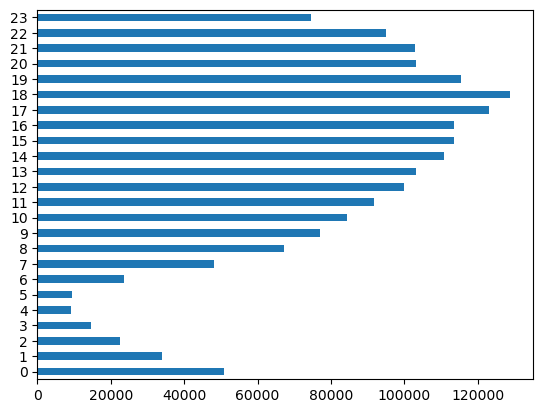

In [110]:
#plt.scatter(x=df1.pickup_hour, y=df1.count)
df1['count'].plot.barh()
plt.show()
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [126]:
# Scale up the number of trips
df1.groupby('pickup_hour')['count'].sum()
# Fill in the value of your sampling fraction and use that to scale up the numbers

#594522 is the sum for hours of five businest hour.(15-19 hour)
     
sample_fraction = 594522 * 20
print(sample_fraction)



11890440


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

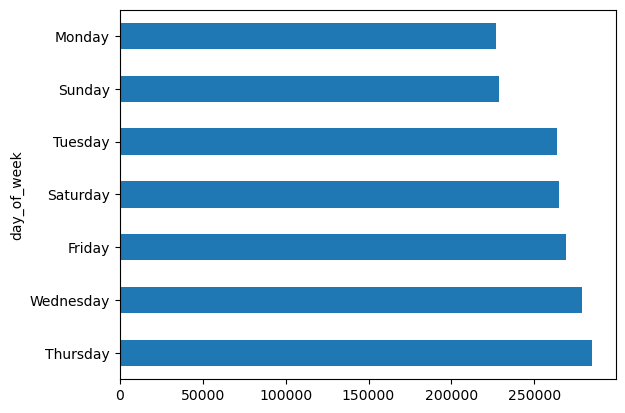

In [61]:
# Compare traffic trends for the week days and weekends

#dfsample['day_of_week'].values_count()

dfsample['day_of_week'].value_counts().plot.barh()
plt.show()



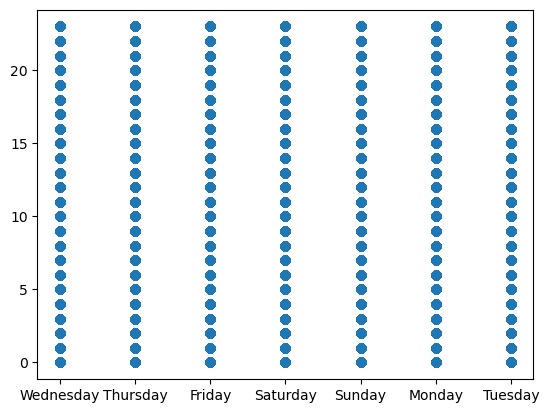

In [138]:
plt.scatter(dfsample.day_of_week, dfsample.pickup_hour)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

In [140]:
##no it doesn't, seems trafic is same for all the hours
merged_df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-02-01 00:14:06   2023-02-01 00:19:52              3.0   
1               1  2023-02-01 00:54:09   2023-02-01 01:13:13              1.0   
2               2  2023-02-01 00:14:36   2023-02-01 00:59:16              1.0   
3               1  2023-02-01 00:49:25   2023-02-01 00:53:12              1.0   
4               1  2023-02-01 00:16:02   2023-02-01 00:22:02              1.0   
...           ...                  ...                   ...              ...   
1816781         2  2023-05-31 21:32:07   2023-05-31 21:43:56              1.0   
1816782         2  2023-05-31 21:25:41   2023-05-31 21:42:50              1.0   
1816783         2  2023-05-31 21:11:35   2023-05-31 21:27:23              4.0   
1816784         2  2023-05-31 21:32:01   2023-05-31 21:45:53              1.0   
1816785         2  2023-05-31 21:41:50   2023-05-31 21:59:27              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 1.25         1.0                  N           234   
1                 5.00         1.0                  N            48   
2                24.04         1.0                  N           114   
3                 0.60         1.0                  N           246   
4                 0.90         1.0                  N           114   
...                ...         ...                ...           ...   
1816781           2.54         1.0                  N            43   
1816782           4.32         1.0                  N           163   
1816783           2.56         1.0                  N            68   
1816784           6.17         1.0                  N           246   
1816785           3.12         1.0                  N           142   

         DOLocationID  payment_type  ...  month   trip_duration  quarter  \
0                 114             1  ...      2 0 days 00:05:46        1   
1                  87             1  ...      2 0 days 00:19:04        1   
2                 121             1  ...      2 0 days 00:44:40        1   
3                  68             1  ...      2 0 days 00:03:47        1   
4                 148             1  ...      2 0 days 00:06:00        1   
...               ...           ...  ...    ...             ...      ...   
1816781            75             1  ...      5 0 days 00:11:49        2   
1816782           112             1  ...      5 0 days 00:17:09        2   
1816783           143             1  ...      5 0 days 00:15:48        2   
1816784           152             1  ...      5 0 days 00:13:52        2   
1816785           107             1  ...      5 0 days 00:17:37        2   

         OBJECTID  Shape_Leng  Shape_Area                       zone  \
0           234.0    0.036072    0.000073                   Union Sq   
1            48.0    0.043747    0.000094               Clinton East   
2           114.0    0.031727    0.000047    Greenwich Village South   
3           246.0    0.069467    0.000281  West Chelsea/Hudson Yards   
4           114.0    0.031727    0.000047    Greenwich Village South   
...           ...         ...         ...                        ...   
1816781      43.0    0.099739    0.000380               Central Park   
1816782     163.0    0.034177    0.000041              Midtown North   
1816783      68.0    0.049337    0.000111               East Chelsea   
1816784     246.0    0.069467    0.000281  West Chelsea/Hudson Yards   
1816785     142.0    0.038176    0.000076        Lincoln Square East   

         LocationID    borough  \
0             234.0  Manhattan   
1              48.0  Manhattan   
2             114.0  Manhattan   
3             246.0  Manhattan   
4             114.0  Manhattan   
...             ...        ...   
1816781        43.0  Manhattan   
1816782       163.0  Manhattan   
1816783        68.0  Manhattan   
1816784       246.0  Manhattan   
1816785       142.0  Manhattan 

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [76]:
# Find top 10 pickup and dropoff zones

hourly_zone_df = merged_df.groupby('zone')['pickup_hour'].size()
hourly_zone_df

zone
Allerton/Pelham Gardens        6
Alphabet City               1821
Arrochar/Fort Wadsworth       24
Astoria                      792
Astoria Park                   6
                           ...  
Woodlawn/Wakefield             9
Woodside                     327
World Trade Center          9579
Yorkville East             23557
Yorkville West             34775
Name: pickup_hour, Length: 252, dtype: int64

In [78]:

hourly_zone_df1 = hourly_zone_df.to_frame()

# Reset the index
hourly_zone_df1 = hourly_zone_df1.reset_index()

# Rename the index column (optional)
hourly_zone_df1 = hourly_zone_df1.rename(columns={'index': 'new_index'})
#df1
#hourly_zone_df1.rename(columns={0: 'count'}, inplace=True)
#sns.distplot(df1.0, bins=20)
#plt.show()
##Printing top 10 values based on pickupzone

hourly_zone_df10 =hourly_zone_df1.sort_values(by='pickup_hour', ascending=False).head(10)

In [80]:
plt.scatter(hourly_zone_df10.pickup_hour, hourly_zone_df10.zone)
plt.show()

In [53]:
merged_df['drop_hour'] = merged_df['tpep_dropoff_datetime'].dt.hour

In [55]:
#hourly_zone_df = merged_df.groupby('zone')['pickup_hour'].size()
hourly_zone_drp = merged_df.groupby('zone')['drop_hour'].size()
hourly_zone_drp
hourly_zone_drp_df = hourly_zone_drp.to_frame()

# Reset the index
hourly_zone_drp_df = hourly_zone_drp_df.reset_index()

# Rename the index column (optional)
hourly_zone_drp_df = hourly_zone_drp_df.rename(columns={'index': 'new_index'})
#df1
#hourly_zone_df1.rename(columns={0: 'count'}, inplace=True)
#sns.distplot(df1.0, bins=20)
#plt.show()
##Printing top 10 values based on pickupzone

hourly_zone_drp_df_10 =hourly_zone_drp_df.sort_values(by='drop_hour', ascending=False).head(10)

In [57]:
hourly_zone_drp_df_10

zone  drop_hour
117                   JFK Airport      96525
226         Upper East Side South      86728
150                Midtown Center      85754
225         Upper East Side North      77336
151                  Midtown East      65472
127             LaGuardia Airport      64058
175  Penn Station/Madison Sq West      63301
219     Times Sq/Theatre District      61136
131           Lincoln Square East      60710
159                   Murray Hill      54305

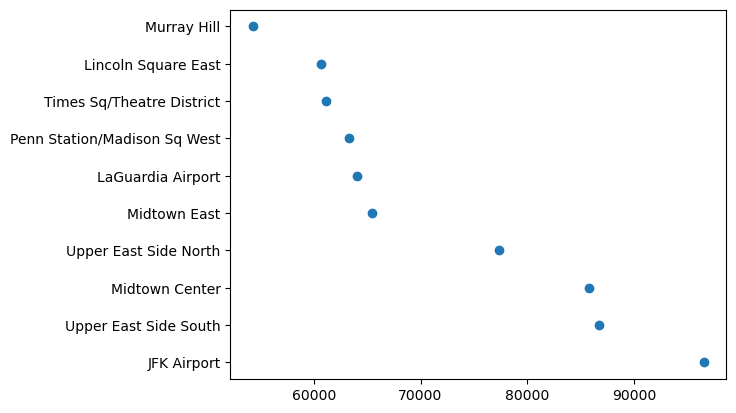

In [59]:
plt.scatter(hourly_zone_drp_df_10.drop_hour, hourly_zone_drp_df_10.zone)
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



In [64]:

hourly_zone_df1

zone  pickup_hour
0    Allerton/Pelham Gardens            6
1              Alphabet City         1821
2    Arrochar/Fort Wadsworth           24
3                    Astoria          792
4               Astoria Park            6
..                       ...          ...
247       Woodlawn/Wakefield            9
248                 Woodside          327
249       World Trade Center         9579
250           Yorkville East        23557
251           Yorkville West        34775

[252 rows x 2 columns]

In [66]:
hourly_zone_drp_df

zone  drop_hour
0    Allerton/Pelham Gardens          6
1              Alphabet City       1821
2    Arrochar/Fort Wadsworth         24
3                    Astoria        792
4               Astoria Park          6
..                       ...        ...
247       Woodlawn/Wakefield          9
248                 Woodside        327
249       World Trade Center       9579
250           Yorkville East      23557
251           Yorkville West      34775

[252 rows x 2 columns]

In [88]:
hourly_zone_df1['ratio'] = hourly_zone_df1['pickup_hour']/ hourly_zone_drp_df['drop_hour']

In [94]:
highest_pickup_drop_ratio = hourly_zone_df1.sort_values(by='ratio', ascending=True).head(10)
highest_pickup_drop_ratio

zone  pickup_hour  ratio
251                 Yorkville West        34775    1.0
0          Allerton/Pelham Gardens            6    1.0
1                    Alphabet City         1821    1.0
2          Arrochar/Fort Wadsworth           24    1.0
236         West Farms/Bronx River           16    1.0
237                   West Village        40290    1.0
238  Westchester Village/Unionport           13    1.0
239                    Westerleigh            4    1.0
240                     Whitestone            9    1.0
241                  Willets Point            3    1.0

In [97]:
lowest_pickup_drop_ratio = hourly_zone_df1.sort_values(by='ratio', ascending=True).head(10)
lowest_pickup_drop_ratio

zone  pickup_hour  ratio
240                 Whitestone            9    1.0
241              Willets Point            3    1.0
242   Williamsbridge/Olinville           22    1.0
243  Williamsburg (North Side)          491    1.0
244  Williamsburg (South Side)          394    1.0
245            Windsor Terrace           21    1.0
246                  Woodhaven           18    1.0
247         Woodlawn/Wakefield            9    1.0
248                   Woodside          327    1.0
1                Alphabet City         1821    1.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts




**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
The recomendation is to use the single passenger ride multiple time a day during night time which results into more revenue.



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
Also pickup zone should be airport as it generates maximum rides. if rides are not available then head towards airport as it has more chances of finding passanger as compare to other zones.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
focus on more single passanger rides pricing can be reduce to attract more passasengers.